In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
import statistics
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\\Projects\\Diabetic prediction research paper\\diabetes 2.csv")

In [3]:
df

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 51)

## Getting rid of all id

In [5]:
df.columns

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
id_columns = ['id','encounter_id','admission_type_id','discharge_disposition_id','admission_source_id','payer_code']
for column in id_columns:
    df.drop(column, axis=1,inplace = True)

## Patient_nbr

In [7]:
df["patient_nbr"].describe()

count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64

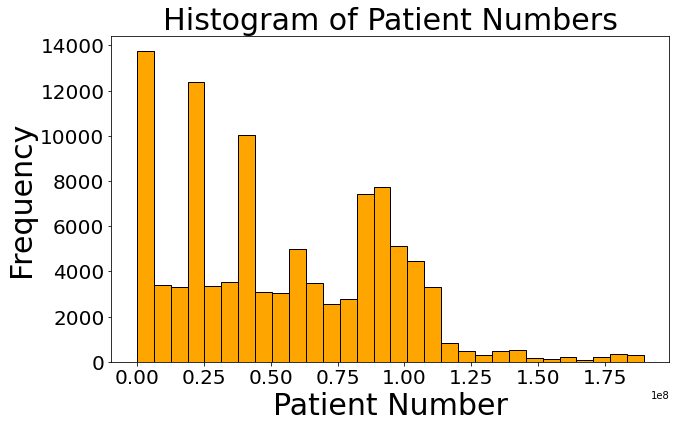

In [74]:
# Histogram for patient_nbr
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df["patient_nbr"], bins=30, color="orange", edgecolor="black")
plt.xlabel("Patient Number", fontsize=30)  # Increase xlabel size
plt.ylabel("Frequency", fontsize=30)  # Increase ylabel size
plt.title("Histogram of Patient Numbers", fontsize=30)  # Increase title size

plt.xticks(fontsize=20)  # Increase x-axis tick labels size
plt.yticks(fontsize=20)  # Increase y-axis tick labels size

plt.show()

In [9]:
# Standard Scaler
# Scaling down its values
from sklearn.preprocessing import StandardScaler

scale_down = StandardScaler()
df["patient_nbr"] = scale_down.fit_transform(df["patient_nbr"].values.reshape(-1,1))

## Race

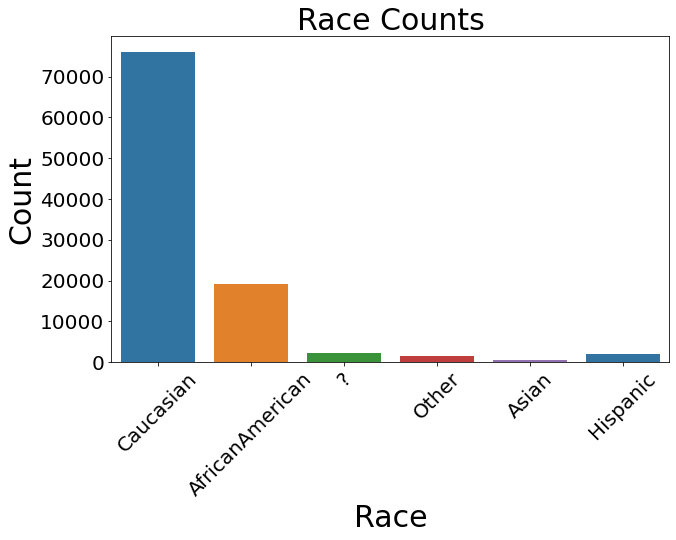

In [76]:
colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="race", palette=colors)

plt.title("Race Counts", fontsize=30)  # Increase title size
plt.xlabel("Race", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.xticks(rotation = 45,fontsize=20)  # Increase x-axis tick labels size
plt.yticks(fontsize=20)  # Increase y-axis tick labels size

plt.show()

In [11]:
# Dropping all columns with value '?'
df = df[df['race'] != '?']

In [12]:
# Doing OneHotEncoding
df_race_dummies = pd.get_dummies(df["race"], drop_first=False)
df.drop("race", axis=1, inplace=True)

# Reset both indexes before concatenating
df.reset_index(drop=True, inplace=True)
df_race_dummies.reset_index(drop=True, inplace=True)

df = pd.concat([df, df_race_dummies], axis=1)

## Gender

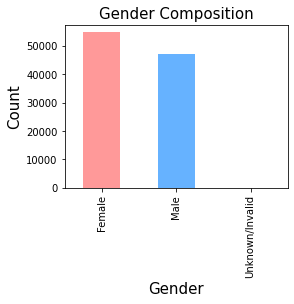

In [10]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(4, 3))
colors = ["#FF9999", "#66B2FF"]
gender_counts.plot.bar(color=colors)

plt.xlabel("Gender", fontsize=15)  # Increase xlabel size
plt.ylabel("Count", fontsize=15)  # Increase ylabel size
plt.title("Gender Composition", fontsize=15)  # Increase title size

plt.show()

In [14]:
# Remove rows with values other than "Female" and "Male"
valid_genders = ['Female', 'Male']
df = df[df['gender'].isin(valid_genders)]

In [15]:
df["gender"].replace({
    "Male" : 0,
    "Female" : 1
}, inplace = True)

In [16]:
df.shape

(99492, 49)

## Age

In [17]:
for i in range(0,10):
    print(df["age"][i])

[0-10)
[10-20)
[20-30)
[30-40)
[40-50)
[50-60)
[60-70)
[70-80)
[80-90)
[90-100)


In [18]:
# For each row, get the lower value and upper value and replace the string with the median of the range
def update_age_range(df, column):
    # Iterate over the rows
    for index, row in df.iterrows():
        age_range = row[column]
        
        # Extract lower and upper age values from the range string
        lower_age = int(age_range.split('-')[0][1:])
        upper_age = int(age_range.split('-')[1][:-1])
        
        # Calculate the average of lower and upper age values
        average_age = (lower_age + upper_age) / 2
        
        # Replace the age range string with the average value
        df.at[index, column] = average_age
        
    return df

In [19]:
df = update_age_range(df, "age")

## Weight

In [20]:
pd.unique(df["weight"])

array(['?', '[75-100)', '[0-25)', '[50-75)', '[100-125)', '[25-50)',
       '[125-150)', '[150-175)', '>200', '[175-200)'], dtype=object)

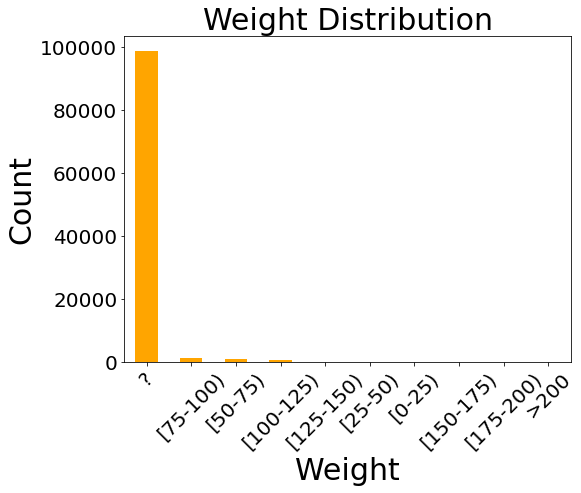

In [78]:
weight_counts = df["weight"].value_counts()

plt.figure(figsize=(8, 6))

weight_counts.plot.bar(color='orange')

plt.xlabel("Weight", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Weight Distribution", fontsize=30)  # Increase title size
plt.xticks(rotation = 45,fontsize=20)  # Increase x-axis tick labels size
plt.yticks(fontsize=20)  # Increase y-axis tick labels size

plt.show()

In [22]:
df.drop("weight",axis=1,inplace= True)

In [23]:
df.shape

(99492, 48)

## Time in Hospital

In [24]:
df["time_in_hospital"].describe()

count    99492.000000
mean         4.398454
std          2.986972
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

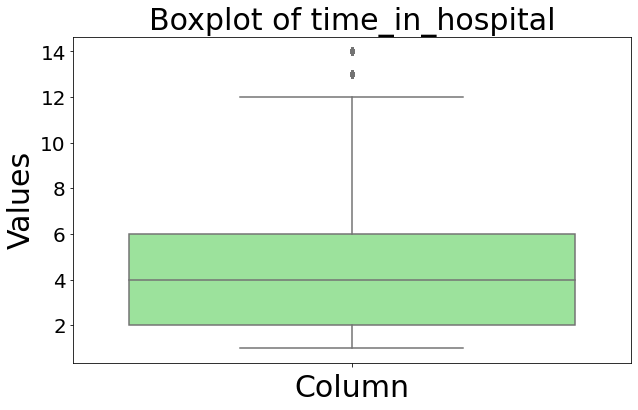

In [80]:
column_name = "time_in_hospital"

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, y=column_name, color='lightgreen')

plt.xlabel("Column", fontsize=30)  # Increase xlabel size
plt.ylabel("Values", fontsize=30)  # Increase ylabel size
plt.title("Boxplot of time_in_hospital", fontsize=30)  # Increase title size

plt.xticks(rotation = 45,fontsize=20)  # Increase x-axis tick labels size
plt.yticks(fontsize=20)  # Increase y-axis tick labels size

plt.show()

## Medical Speciality

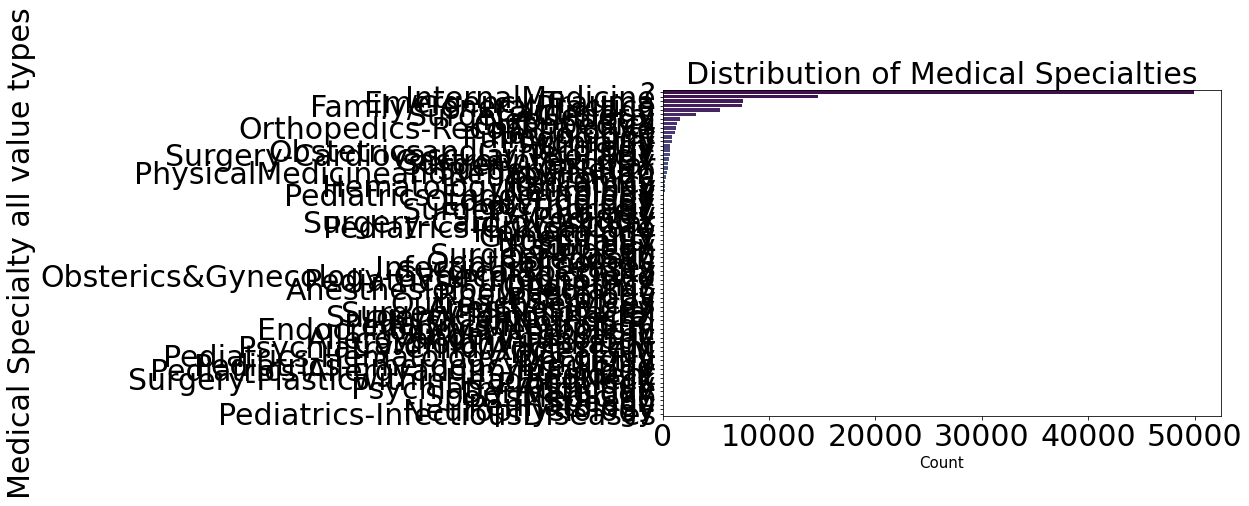

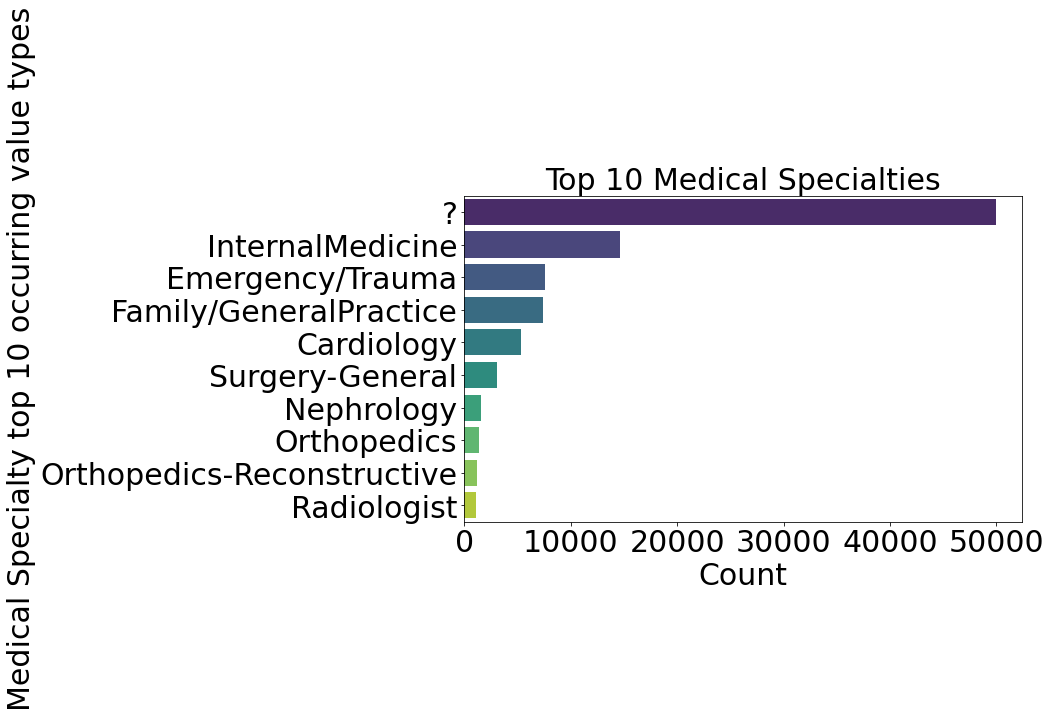

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original code for countplot

medical_specialties = df["medical_specialty"].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="medical_specialty", order=medical_specialties.index, palette="viridis")

plt.xlabel("Count", fontsize=15)  # Increase xlabel size
plt.ylabel("Medical Specialty all value types", fontsize=30)  # Increase ylabel size
plt.title("Distribution of Medical Specialties", fontsize=30)  # Increase title size

plt.xticks(fontsize = 30)  # Increase x-axis tick labels size
plt.yticks(fontsize = 30)  # Increase y-axis tick labels size

plt.show()

# Original code for barplot

top_categories = 10
filtered_medical_specialties = medical_specialties[:top_categories]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_medical_specialties.values, y=filtered_medical_specialties.index, palette="viridis")

plt.xlabel("Count", fontsize=30)  # Increase xlabel size
plt.ylabel("Medical Specialty top 10 occurring value types", fontsize=30)  # Increase ylabel size
plt.title(f"Top {top_categories} Medical Specialties", fontsize=30)  # Increase title size

plt.xticks(fontsize = 30)  # Increase x-axis tick labels size
plt.yticks(fontsize = 30)  # Increase y-axis tick labels size

plt.show()


In [27]:
# Choosing to drop this column
df.drop("medical_specialty",axis=1,inplace = True)

## Number of Lab Procedures

In [28]:
df["num_lab_procedures"].describe()

count    99492.000000
mean        43.072971
std         19.695587
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64

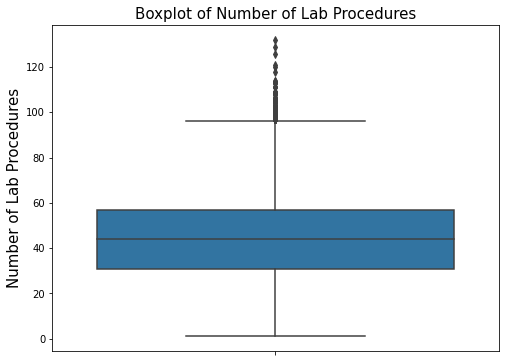

In [14]:
column_name = "num_lab_procedures"

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y=column_name)

plt.ylabel("Number of Lab Procedures", fontsize=15)  # Increase ylabel size
plt.title("Boxplot of Number of Lab Procedures", fontsize=15)  # Increase title size

plt.show()

##### Outlier Removal Using Z-Score 

In [30]:
# Getting rid of outliers (using z-score standardization)
# Removing those whose z-score lies outside 3 

def column_outlier_values(column, df):
    outlier_values = []
    threshold = 3
    mean = statistics.mean(df[column])
    std = statistics.stdev(df[column])
    
    for value in df[column]:
        z_score = (value - mean) / std
        if abs(z_score) > threshold:
            outlier_values.append(value)
    
    return outlier_values

In [31]:
# All the outliers for 'num_lab_procedures'
LabProcedures_outliers = column_outlier_values("num_lab_procedures", df)
print(LabProcedures_outliers)

# Dropping the rows whose 'num_lab_procedures' feature has these values
df = df[~df["num_lab_procedures"].isin(LabProcedures_outliers)]

[103, 105, 103, 105, 114, 113, 103, 105, 111, 129, 107, 108, 106, 104, 106, 109, 103, 105, 106, 120, 104, 113, 111, 109, 114, 113, 104, 105, 105, 111, 108, 103, 106, 109, 132, 106, 109, 121, 108, 108, 126, 103, 118]


In [32]:
df["num_lab_procedures"].isnull().sum()

0

## Number of Medications

In [33]:
df["num_medications"].describe()

count    99449.000000
mean        16.021549
std          8.115724
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

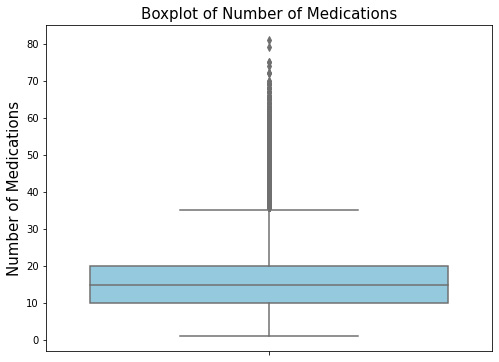

In [15]:
column_name = "num_medications"

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y=column_name, color='skyblue')

plt.ylabel("Number of Medications", fontsize=15)  # Increase ylabel size
plt.title("Boxplot of Number of Medications", fontsize=15)  # Increase title size

plt.show()

## Number of Outpatients 

In [35]:
# Outpatients: Patients who aren't at the hostpital facility for treatment, 
# who don't need to be and stay admitted at the hospital

In [36]:
df["number_outpatient"].describe()

count    99449.000000
mean         0.373327
std          1.276794
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_outpatient, dtype: float64

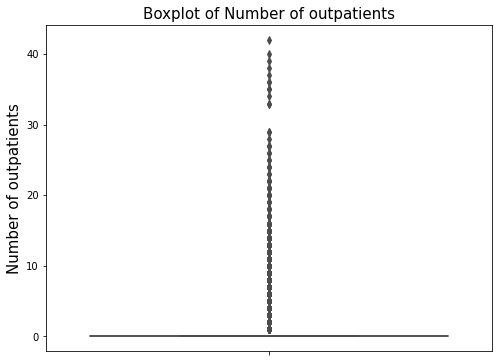

In [16]:
column_name = "number_outpatient"

plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y=column_name, color='orange')

plt.ylabel("Number of outpatients", fontsize=15)  # Increase ylabel size
plt.title("Boxplot of Number of outpatients", fontsize=15)  # Increase title size

plt.show()

## Number emergency

In [38]:
df["number_emergency"].describe()

count    99449.000000
mean         0.201229
std          0.939651
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64

In [39]:
df["number_emergency"].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29],
      dtype=int64)

## Number Inpatient

In [40]:
df["number_inpatient"].describe()

count    99449.000000
mean         0.643023
std          1.270310
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: number_inpatient, dtype: float64

## Diag 1

In [41]:
df["diag_1"]

0        250.83
1           276
2           648
3             8
4           197
          ...  
99488    250.13
99489       560
99490        38
99491       996
99492       530
Name: diag_1, Length: 99449, dtype: object

In [42]:
# Printing all values of diag_1 which cannot be converted to float (therefore are invalid here)

column_name = "diag_1"
non_float_values = set()
# Iterate over the values in the column
for value in df[column_name]:
    try:
        # Attempt to convert the value to a float
        float(value)
    except ValueError:
        # If conversion to float fails, add the value to the set of non-float values
        non_float_values.add(value)
        
# Print the unique non-float values
for value in non_float_values:
    print(value,end=", ")

V26, V60, V54, V56, V07, V51, V57, V70, V71, V67, V63, ?, V45, V25, V43, V66, V53, V55, E909, V58, 

In [43]:
# Dropping those rows which cannot be converted to int (i.e most probably are invalid entries)
def delete_rows_with_nonconvertible_values(df, column):
    # Create a mask to keep track of rows to delete
    mask = []
    
    # Iterate over the values in the column
    for index, value in enumerate(df[column]):
        try:
            int(value)  # Try converting to int
            mask.append(True)  # Value can be converted to int, keep the row
        except ValueError:
            mask.append(False)  # Value cannot be converted to int, mark the row for deletion
    
    # Update the DataFrame by filtering using the mask to delete rows
    df_filtered = df[mask]
    
    return df_filtered

df = delete_rows_with_nonconvertible_values(df, "diag_1")

In [44]:
#Standard Scaler
# Scaling down diag_1's values
scale_down = StandardScaler()
df["diag_1"] = scale_down.fit_transform(df["diag_1"].values.reshape(-1,1))

## diag 2

In [45]:
df["diag_2"].describe()

count     89483
unique      728
top         428
freq       6210
Name: diag_2, dtype: object

In [46]:
# Printing all values of diag_2 which cannot be converted to float (therefore are invalid here)

column_name = "diag_2"

non_float_values = set()

# Iterate over the values in the column
for value in df[column_name]:
    try:
        # Attempt to convert the value to a float
        float(value)
    except ValueError:
        # If conversion to float fails, add the value to the set of non-float values
        non_float_values.add(value)

# Print the unique non-float values
for value in non_float_values:
    print(value,end=", ")

E929, E945, E826, E821, E880, E924, E932, V13, E930, E927, E938, V12, E890, E928, V63, V64, V66, E816, V53, E918, E883, E888, V11, V61, V10, E937, E853, V08, E819, E870, V46, V70, V49, E931, E934, V09, E858, E905, E939, E887, V43, E818, V85, V62, E829, E868, E906, V54, E916, E849, E817, E935, V57, E900, V44, V18, V69, V50, E814, V14, E854, ?, E884, V45, E933, V55, V02, E879, E850, V86, E885, V17, E919, V65, E882, E944, E942, V23, E947, E812, E968, V42, V72, V25, E917, V15, E941, E950, E915, V58, E936, E813, V16, E881, E878, E980, 

In [47]:
# Dropping those rows which cannot be converted to float
df = delete_rows_with_nonconvertible_values(df, "diag_2")

In [48]:
#Standardization
scale_down = StandardScaler()
df["diag_2"] = scale_down.fit_transform(df["diag_2"].values.reshape(-1,1))

## Diag 3  (Same as diag1 and diag2)

In [49]:
# Dropping those rows which cannot be converted to int
df = delete_rows_with_nonconvertible_values(df, "diag_3")

In [50]:
#Standardization
scale_down = StandardScaler()
df["diag_3"] = scale_down.fit_transform(df["diag_3"].values.reshape(-1,1))

## Number Diagnosis

In [51]:
df["number_diagnoses"].describe()

count    72066.000000
mean         7.603391
std          1.791010
min          3.000000
25%          6.000000
50%          9.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64

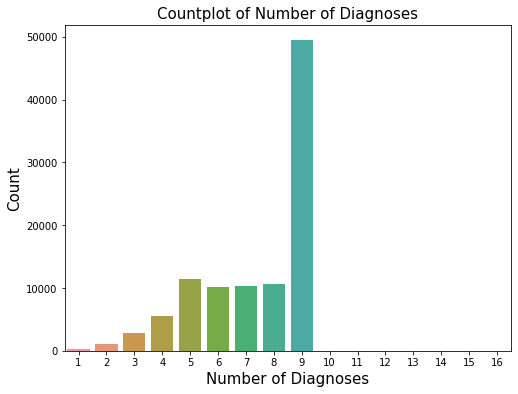

In [17]:
column_name = "number_diagnoses"

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x=column_name)

plt.xlabel("Number of Diagnoses", fontsize=15)  # Increase xlabel size
plt.ylabel("Count", fontsize=15)  # Increase ylabel size
plt.title("Countplot of Number of Diagnoses", fontsize=15)  # Increase title size

plt.show()

## Max Glu Serum  

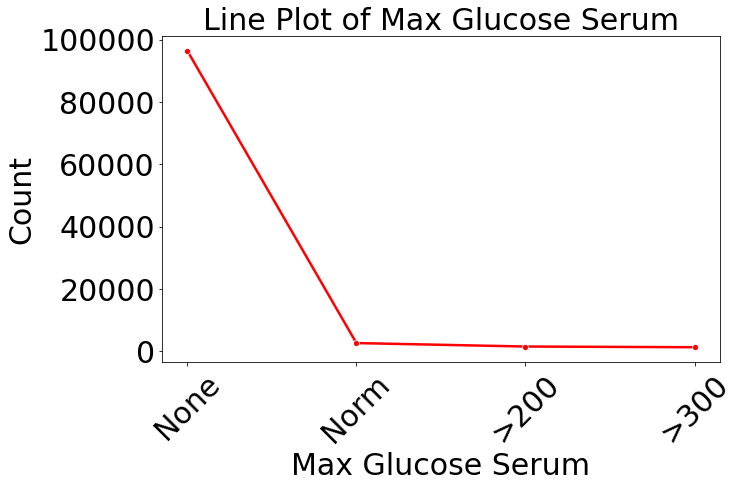

In [91]:
column_name = "max_glu_serum"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

# Create a line plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size if desired

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="red", linewidth=2.5)

plt.xlabel("Max Glucose Serum", fontsize = 30)  # Increase xlabel size by 50%
plt.ylabel("Count", fontsize= 30)  # Increase ylabel size by 50%
plt.title("Line Plot of Max Glucose Serum", fontsize= 30)  # Increase title size by 50%

plt.xticks(rotation=45, fontsize=30)  # Rotate x-axis labels if needed and increase fontsize by 50%
plt.yticks(fontsize=30)  # Increase y-axis labels fontsize by 50%

plt.show()

In [54]:
# Label Encoding
'''
None : 0
Norm : 1
>200 : 2
>300 : 3
'''
label_mapping = {
    "None" : 0,
    "Norm" : 1,
    ">200" : 2,
    ">300" : 3
}

df["max_glu_serum"] = df["max_glu_serum"].map(label_mapping)

## A1Cresult  

In [55]:
# Also known as A1C test, measures the level of HbA1c in the blood

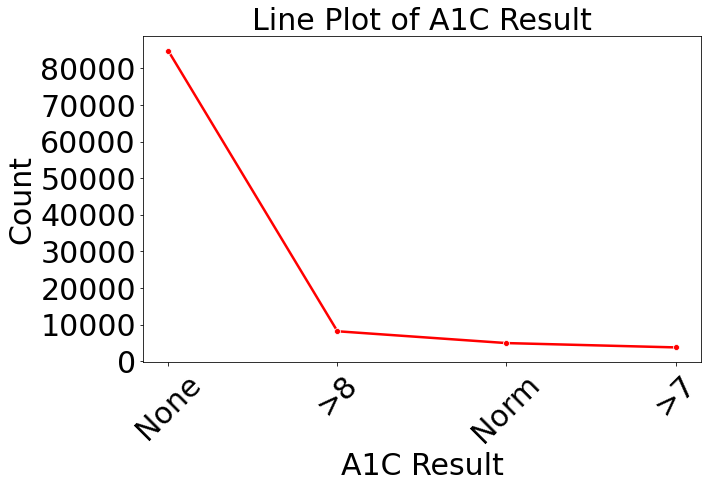

In [92]:
column_name = "A1Cresult"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="red", linewidth=2.5)

plt.xlabel("A1C Result", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of A1C Result", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [57]:
'''
Norm - This option likely represents a normal or optimal A1C level.
A normal A1C level typically falls within the range of 4% to 5.6%. 
It indicates good blood sugar control and lower risk of diabetes-related complications.

7 - This option suggests an A1C level greater than 7%. 
A value above 7% is often used as a threshold for diagnosing diabetes or 
indicating suboptimal blood sugar control. 
It indicates a higher risk of diabetes-related complications.

8 - This option indicates an A1C level greater than 8%.
A value above 8% suggests even poorer blood sugar control and an increased
risk of complications associated with diabetes.
'''

'\nNorm - This option likely represents a normal or optimal A1C level.\nA normal A1C level typically falls within the range of 4% to 5.6%. \nIt indicates good blood sugar control and lower risk of diabetes-related complications.\n\n7 - This option suggests an A1C level greater than 7%. \nA value above 7% is often used as a threshold for diagnosing diabetes or \nindicating suboptimal blood sugar control. \nIt indicates a higher risk of diabetes-related complications.\n\n8 - This option indicates an A1C level greater than 8%.\nA value above 8% suggests even poorer blood sugar control and an increased\nrisk of complications associated with diabetes.\n'

In [58]:
# Label Encoding
'''
Norm : 0
>7 : 1
>8 : 2
None : 3
'''
label_mapping = {
    "Norm" : 0,
    ">7" : 1,
    ">8" : 2,
    "None" : 3
}

df["A1Cresult"] = df["A1Cresult"].map(label_mapping)

## Metformin 

In [59]:
'''
Metformin is a biguanide drug that reduces blood glucose levels by decreasing glucose
production in the liver, decreasing intestinal absorption, 
and increasing insulin sensitivity.
'''

'\nMetformin is a biguanide drug that reduces blood glucose levels by decreasing glucose\nproduction in the liver, decreasing intestinal absorption, \nand increasing insulin sensitivity.\n'

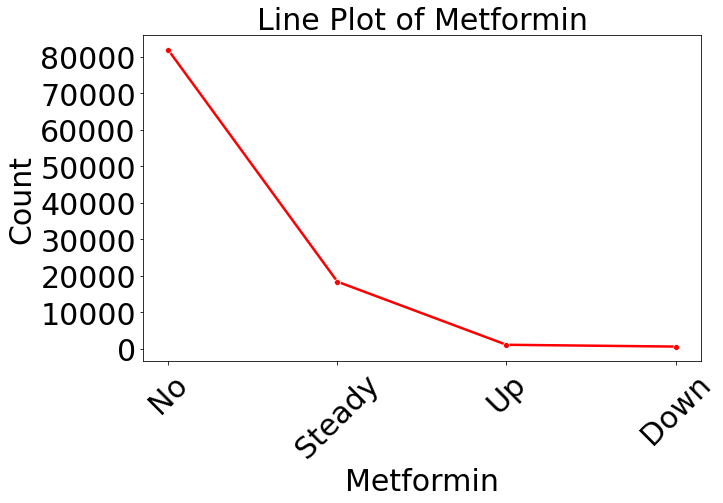

In [62]:
column_name = "metformin"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="red", linewidth=2.5)

plt.xlabel("Metformin", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Metformin", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [61]:
'''
Down - This option suggests a decrease or reduction in the dosage of metformin. 
A decrease in dosage may indicate that the patient's blood glucose levels are well-controlled, and their healthcare provider has determined that a lower dosage is appropriate.

No - This option indicates that the patient is not taking metformin. 
If metformin is prescribed for the management of type 2 diabetes, not taking it may imply that the patient's blood glucose levels are either well-controlled through other means (such as lifestyle modifications or alternative medications) or that metformin is not suitable or prescribed for the patient's specific situation.

Steady - This option implies that the patient is taking metformin at a consistent and steady dosage.
It suggests that the patient's blood glucose levels are being maintained, but there may not be any recent changes in the dosage.

Up - This option suggests an increase in the dosage of metformin.
An increase in dosage may be required if the patient's blood glucose levels are not
adequately controlled with the current dosage, and their healthcare provider has decided 
to adjust the medication to achieve better glycemic control.
'''

"\nDown - This option suggests a decrease or reduction in the dosage of metformin. \nA decrease in dosage may indicate that the patient's blood glucose levels are well-controlled, and their healthcare provider has determined that a lower dosage is appropriate.\n\nNo - This option indicates that the patient is not taking metformin. \nIf metformin is prescribed for the management of type 2 diabetes, not taking it may imply that the patient's blood glucose levels are either well-controlled through other means (such as lifestyle modifications or alternative medications) or that metformin is not suitable or prescribed for the patient's specific situation.\n\nSteady - This option implies that the patient is taking metformin at a consistent and steady dosage.\nIt suggests that the patient's blood glucose levels are being maintained, but there may not be any recent changes in the dosage.\n\nUp - This option suggests an increase in the dosage of metformin.\nAn increase in dosage may be required

In [62]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["metformin"] = df["metformin"].map(label_mapping)

## repaglinide 

In [63]:
'''
Repaglinide is a drug used in the treatment of diabetes mellitus type 2.
It belongs to a class of antihyperglycemic agents known as meglitinides, 
along with nateglinide.
'''

'\nRepaglinide is a drug used in the treatment of diabetes mellitus type 2.\nIt belongs to a class of antihyperglycemic agents known as meglitinides, \nalong with nateglinide.\n'

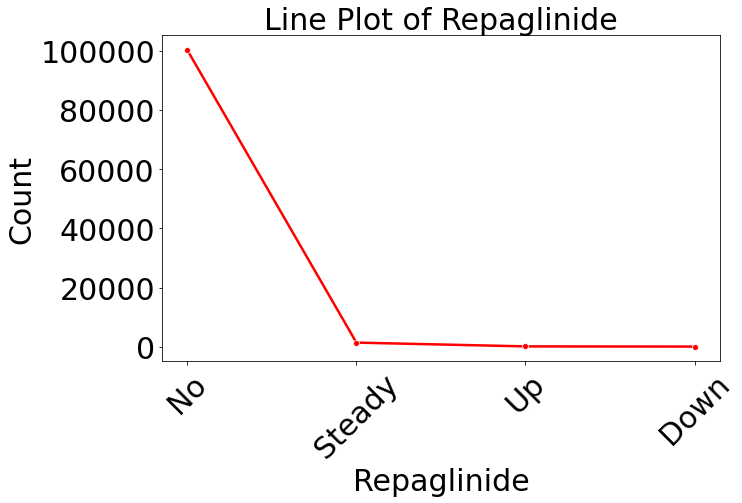

In [63]:
column_name = "repaglinide"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="red", linewidth=2.5)

plt.xlabel("Repaglinide", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Repaglinide", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [65]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["repaglinide"] = df["repaglinide"].map(label_mapping)

## nateglinide 

In [66]:
'''
Nateglinide is a drug for the treatment of type 2 diabetes. 
Nateglinide was developed by Ajinomoto, a Japanese company and sold by the Swiss 
pharmaceutical company Novartis.

'''

'\nNateglinide is a drug for the treatment of type 2 diabetes. \nNateglinide was developed by Ajinomoto, a Japanese company and sold by the Swiss \npharmaceutical company Novartis.\n\n'

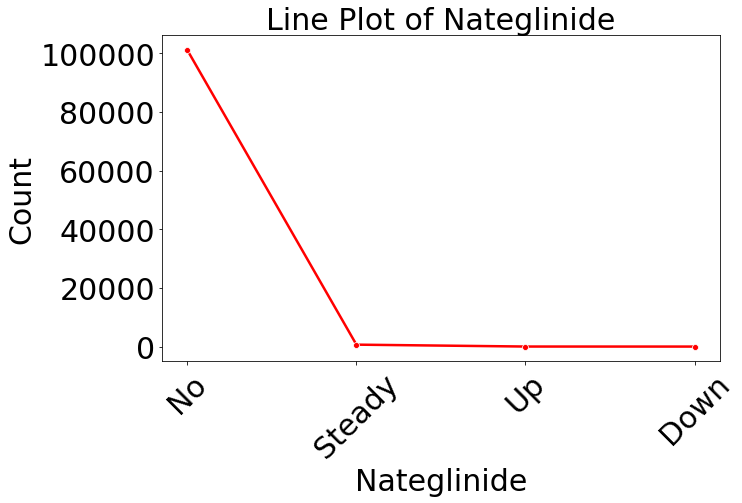

In [64]:
column_name = "nateglinide"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="red", linewidth=2.5)

plt.xlabel("Nateglinide", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Nateglinide", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [68]:
# drop this column
df.drop("nateglinide",axis=1,inplace = True)

## chlorpropamide

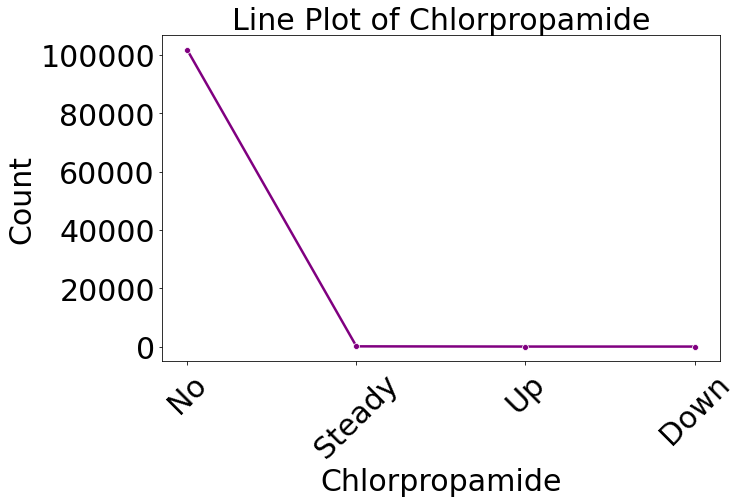

In [66]:
column_name = "chlorpropamide"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="purple", linewidth=2.5)

plt.xlabel("Chlorpropamide", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Chlorpropamide", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [70]:
df.drop("chlorpropamide",axis=1,inplace = True)

## glimepiride  

In [71]:
'''
Glimepiride is a medication used in the management and treatment of type 2 diabetes mellitus. 
It is in the sulfonylurea class of drugs. This activity outlines the indications, 
mechanism of action, and contraindications for glimepiride as a valuable agent in managing 
type 2 diabetes mellitus.

'''

'\nGlimepiride is a medication used in the management and treatment of type 2 diabetes mellitus. \nIt is in the sulfonylurea class of drugs. This activity outlines the indications, \nmechanism of action, and contraindications for glimepiride as a valuable agent in managing \ntype 2 diabetes mellitus.\n\n'

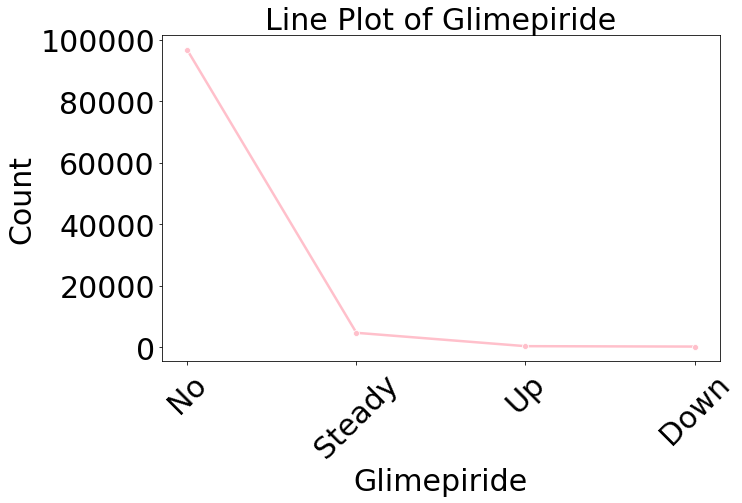

In [67]:
column_name = "glimepiride"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="pink", linewidth=2.5)

plt.xlabel("Glimepiride", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Glimepiride", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size

plt.show()

In [73]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["glimepiride"] = df["glimepiride"].map(label_mapping)

## acetohexamide

In [74]:
df["acetohexamide"].value_counts()   #LOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOl

No        72065
Steady        1
Name: acetohexamide, dtype: int64

In [75]:
df.drop("acetohexamide",axis=1,inplace = True)

## glipizide  

In [76]:
'''
Glipizide, sold under the brand name Glucotrol among others, is an anti-diabetic medication of 
the sulfonylurea class used to treat type 2 diabetes. It is used together with a diabetic diet 
and exercise.It is not indicated for use by itself in type 1 diabetes. It is taken by mouth.
'''

'\nGlipizide, sold under the brand name Glucotrol among others, is an anti-diabetic medication of \nthe sulfonylurea class used to treat type 2 diabetes. It is used together with a diabetic diet \nand exercise.It is not indicated for use by itself in type 1 diabetes. It is taken by mouth.\n'

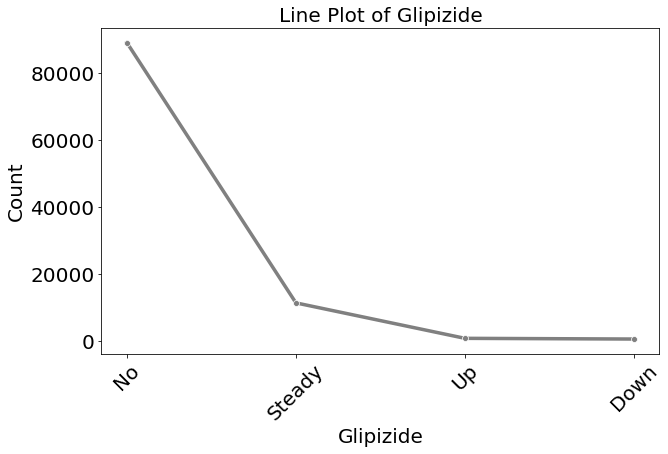

In [55]:
column_name = "glipizide"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="grey", linewidth=3.5)

plt.xlabel("Glipizide", fontsize=20)  # Increase xlabel size
plt.ylabel("Count", fontsize=20)  # Increase ylabel size
plt.title("Line Plot of Glipizide", fontsize=20)  # Increase title size

plt.xticks(rotation=45, fontsize = 20)  # Rotate x-axis labels if needed
plt.yticks(fontsize=20)  # Increase y-axis tick labels size

plt.show()

In [78]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["glipizide"] = df["glipizide"].map(label_mapping)

## glyburide  

In [79]:
'''
Glibenclamide, also known as glyburide, is an antidiabetic medication used to treat type 2 diabetes.
It is recommended that it be taken together with diet and exercise. 
It may be used with other antidiabetic medication. 
It is not recommended for use by itself in type 1 diabetes
'''

'\nGlibenclamide, also known as glyburide, is an antidiabetic medication used to treat type 2 diabetes.\nIt is recommended that it be taken together with diet and exercise. \nIt may be used with other antidiabetic medication. \nIt is not recommended for use by itself in type 1 diabetes\n'

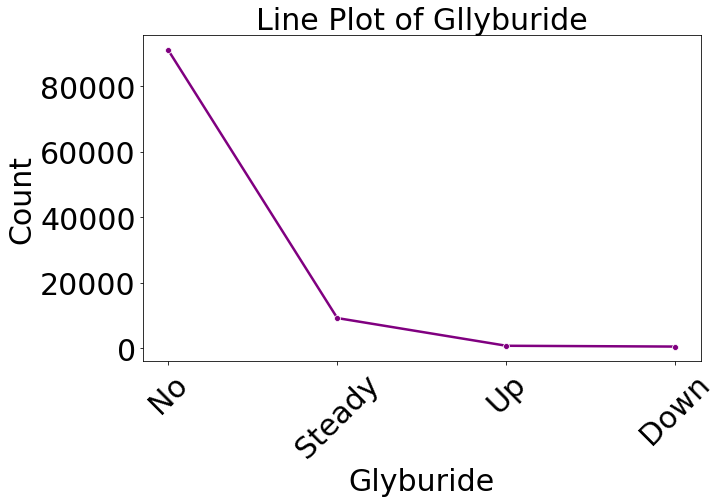

In [94]:
column_name = "glyburide"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color="purple", linewidth=2.5)

plt.xlabel("Glyburide", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Gllyburide", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size


plt.show()

In [81]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["glyburide"] = df["glyburide"].map(label_mapping)

## Tolbutamide

In [82]:
df["tolbutamide"].value_counts()

No        72047
Steady       19
Name: tolbutamide, dtype: int64

In [83]:
df.drop("tolbutamide",axis=1,inplace = True)

## Pioglitazone 

In [84]:
'''
Pioglitazone, sold under the brand name Actos among others,
is an anti-diabetic medication used to treat type 2 diabetes. 
It may be used with metformin, a sulfonylurea, or insulin. 
Use is recommended together with exercise and diet. 
It is not recommended in type 1 diabetes. It is taken by mouth.
'''

'\nPioglitazone, sold under the brand name Actos among others,\nis an anti-diabetic medication used to treat type 2 diabetes. \nIt may be used with metformin, a sulfonylurea, or insulin. \nUse is recommended together with exercise and diet. \nIt is not recommended in type 1 diabetes. It is taken by mouth.\n'

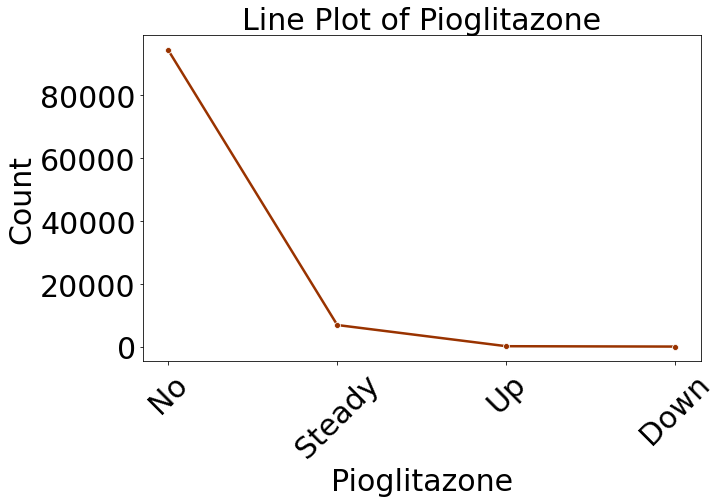

In [95]:
column_name = "pioglitazone"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

# Create a line plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size if desired

color = '#993300'  # Custom color similar to pioglitazone

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color=color, linewidth=2.5)

plt.xlabel("Pioglitazone", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Pioglitazone", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size


plt.show()


In [86]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["pioglitazone"] = df["pioglitazone"].map(label_mapping)

## rosiglitazone 

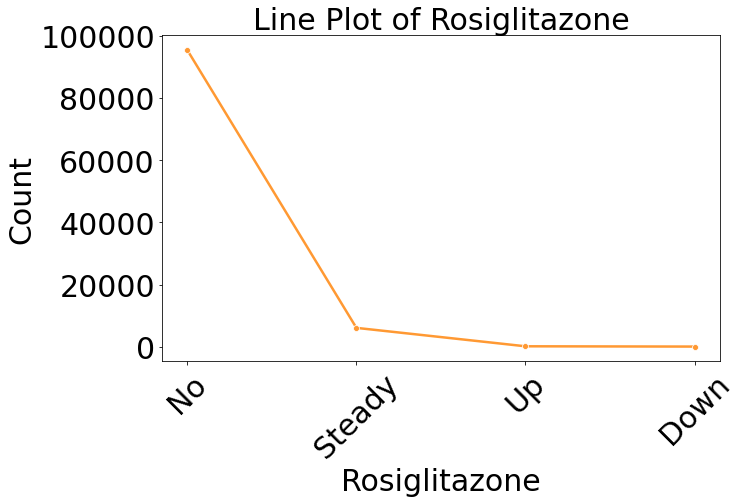

In [96]:
column_name = "rosiglitazone"

# Get the value counts for the column
value_counts = df[column_name].value_counts()

# Create a line plot using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size if desired

color = '#FF9933'  # Custom color similar to rosiglitazone

sns.lineplot(x=value_counts.index, y=value_counts.values, marker="o", color=color, linewidth=2.5)

plt.xlabel("Rosiglitazone", fontsize=30)  # Increase xlabel size
plt.ylabel("Count", fontsize=30)  # Increase ylabel size
plt.title("Line Plot of Rosiglitazone", fontsize=30)  # Increase title size

plt.xticks(rotation=45, fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize=30)  # Increase y-axis tick labels size
plt.show()

In [88]:
# Label Encoding
'''
Down : 0
No : 1
Steady : 2
Up : 3
'''
label_mapping = {
    "Down" : 0,
    "No" : 1,
    "Steady" : 2,
    "Up" : 3
}

df["rosiglitazone"] = df["rosiglitazone"].map(label_mapping)

## acarbose

In [89]:
df["acarbose"].value_counts()

No        71841
Steady      215
Up            7
Down          3
Name: acarbose, dtype: int64

In [90]:
df.drop("acarbose",axis=1,inplace = True)

## miglitol

In [91]:
df["miglitol"].value_counts()

No        72039
Steady       23
Down          3
Up            1
Name: miglitol, dtype: int64

In [92]:
df.drop("miglitol",axis=1,inplace = True)

## troglitazone

In [93]:
df["troglitazone"].value_counts()

No        72064
Steady        2
Name: troglitazone, dtype: int64

In [94]:
df.drop("troglitazone",axis=1,inplace = True)

## examide

In [95]:
df["examide"].value_counts()

No    72066
Name: examide, dtype: int64

In [96]:
df.drop("examide",axis=1,inplace = True)

## citoglipton

In [97]:
df["citoglipton"].value_counts()

No    72066
Name: citoglipton, dtype: int64

In [98]:
df.drop("citoglipton",axis=1,inplace = True)

## Insulin  

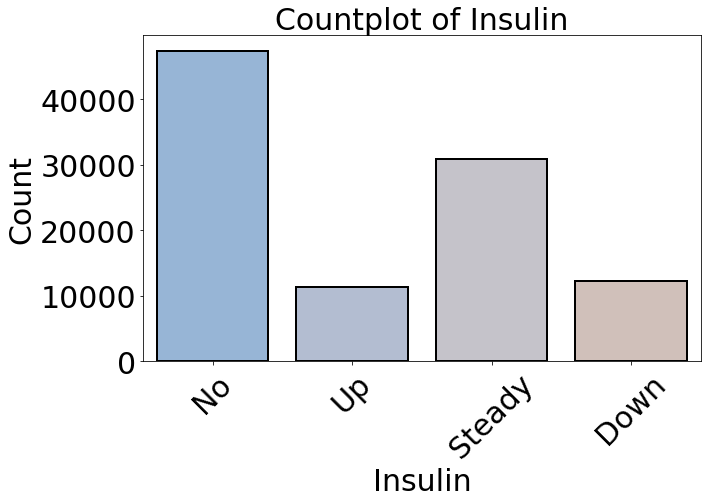

In [97]:
column_name = "insulin"

# Define a custom color palette with hybrid colors
color_palette = ["#8CB4E1", "#AEBBD6", "#C4C2CB", "#D4BEB6", "#E1B8A4"]

# Create a countplot using seaborn and the custom color palette
plt.figure(figsize=(10, 6))  # Set the figure size if desired

sns.countplot(data=df, x=column_name, palette=color_palette, linewidth=2, edgecolor="black")

plt.xlabel("Insulin", fontsize=30)  # Increase xlabel size by 50%
plt.ylabel("Count", fontsize=30)  # Increase ylabel size by 50%
plt.title("Countplot of Insulin", fontsize=30)  # Increase title size by 50%

plt.xticks(rotation=45,fontsize = 30)  # Rotate x-axis labels if needed
plt.yticks(fontsize = 30)
plt.show()

In [100]:
# Label Encoding
'''
    'No': 0,
    'Steady': 1,
    'Down': 2,
    'Up': 3
'''
label_mapping = {
    'No': 0,
    'Steady': 1,
    'Down': 2,
    'Up': 3
}

df["insulin"] = df["insulin"].map(label_mapping)

## glyburide metformin

In [101]:
df["glyburide.metformin"].value_counts()

No        71553
Steady      506
Up            5
Down          2
Name: glyburide.metformin, dtype: int64

In [102]:
df.drop("glyburide.metformin",axis=1,inplace = True)

## glipizide metformin

In [103]:
df["glipizide.metformin"].value_counts()

No        72058
Steady        8
Name: glipizide.metformin, dtype: int64

In [104]:
df.drop("glipizide.metformin",axis=1,inplace = True)

## glimepiride pioglitazone

In [105]:
df['glimepiride.pioglitazone'].value_counts()

No    72066
Name: glimepiride.pioglitazone, dtype: int64

In [106]:
df.drop('glimepiride.pioglitazone', axis=1, inplace = True)

## metformin rosiglitazone

In [107]:
df['metformin.rosiglitazone'].value_counts()

No    72066
Name: metformin.rosiglitazone, dtype: int64

In [108]:
df.drop('metformin.rosiglitazone',axis=1,inplace = True)

## metformin.pioglitazone

In [109]:
df["metformin.pioglitazone"].value_counts()

No        72065
Steady        1
Name: metformin.pioglitazone, dtype: int64

In [110]:
df.drop("metformin.pioglitazone",axis=1,inplace = True)

## Tolazamide

In [111]:
df["tolazamide"].value_counts()

No        72036
Steady       29
Up            1
Name: tolazamide, dtype: int64

In [112]:
df.drop("tolazamide",axis=1,inplace = True)

## change  

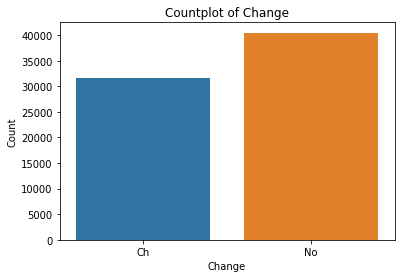

In [113]:
column_name = "change"

# Create a countplot using seaborn
plt.figure(figsize=(6, 4))  # Set the figure size if desired

sns.countplot(data=df, x=column_name)

plt.xlabel("Change")
plt.ylabel("Count")
plt.title("Countplot of Change")

plt.show()

In [114]:
'''
ch : 0
No : 1
'''
label_mapping = {
    "No" : 0,
    "Ch" : 1
}

df["change"] = df["change"].map(label_mapping)

## diabetesMed  (Our Label)

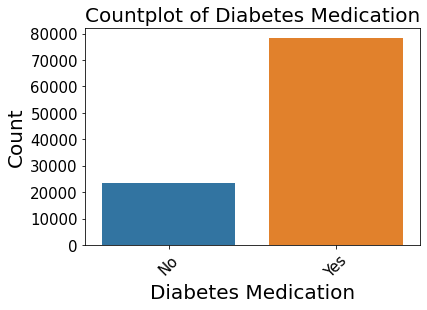

In [101]:
column_name = "diabetesMed"

# Create a countplot using seaborn
plt.figure(figsize=(6, 4))  # Set the figure size if desired

sns.countplot(data=df, x=column_name)

plt.xlabel("Diabetes Medication", fontsize = 20)  # Increase xlabel size by 50%
plt.ylabel("Count", fontsize = 20)  # Increase ylabel size by 50%
plt.title("Countplot of Diabetes Medication", fontsize = 20)  # Increase title size by 50%

plt.xticks(rotation=45,fontsize = 15)  # Rotate x-axis labels if needed
plt.yticks(fontsize = 15)

plt.show()

In [116]:
df["diabetesMed"] = df["diabetesMed"].replace({"Yes": 1, "No": 0})

## Readmitted 

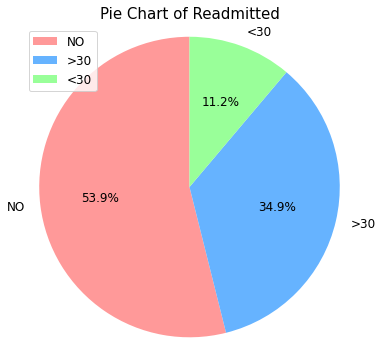

In [34]:
column_name = "readmitted"

# Get the value counts for the "readmitted" column
value_counts = df[column_name].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))  # Set the figure size if desired

# Set custom colors for the pie chart
colors = ["#FF9999", "#66B3FF", "#99FF99"]

# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Pie Chart of Readmitted", fontsize=15)  # Increase title size by 50%
plt.legend(fontsize=12)  # Increase legend font size by 50%

# Increase the font size of the percentage labels by 50%
for text in plt.gca().texts:
    text.set_fontsize(12)

plt.show()

In [118]:
# Label Encoding
'''
  No : 0
  >30 : 1
  <30 : 2
'''
df["readmitted"].replace({
    "NO" : 0,
    ">30" : 1,
    "<30" : 2,
},inplace = True)

In [119]:
df.isnull().sum()

patient_nbr           0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
max_glu_serum         0
A1Cresult             0
metformin             0
repaglinide           0
glimepiride           0
glipizide             0
glyburide             0
pioglitazone          0
rosiglitazone         0
insulin               0
change                0
diabetesMed           0
readmitted            0
AfricanAmerican       0
Asian                 0
Caucasian             0
Hispanic              0
Other                 0
dtype: int64

In [120]:
df.shape

(72066, 32)

## Studying the Correlation of features with diabetesMed

####  1) Extra Trees Regressor 
#### 2) Correlation Matrix

#### Firstly Extra Trees Regressor

In [120]:
df.columns

Index(['patient_nbr', 'gender', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic',
       'Other'],
      dtype='object')

In [121]:
x = df[['patient_nbr', 'gender', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'readmitted', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic',
       'Other']]

Y = df[["diabetesMed"]]

In [122]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,Y)

ExtraTreesRegressor()

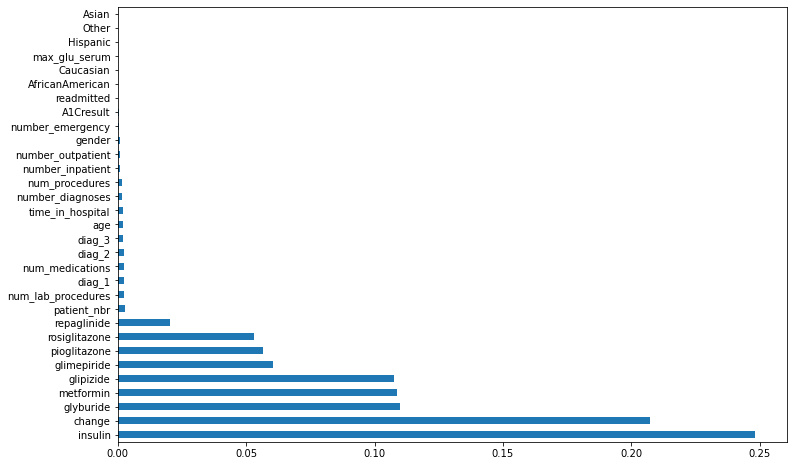

In [123]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(12,8))
feature_importance=pd.Series(selection.feature_importances_,index=x.columns)
feature_importance.nlargest(40).plot(kind="barh")
plt.show()

#### Secondly Correlation Coefficient

###  Comparing the correlation coefficients and percentage influence on diabetesMed by each feature


In [124]:
columns_of_interest = df.columns.tolist()

# Calculate correlation coefficients
correlations = df[columns_of_interest].corr()['diabetesMed']

# Sort correlation coefficients in ascending order
correlations_sorted = correlations.sort_values()

# Create a new DataFrame to store the correlation information
correlation_table = pd.DataFrame({
    'Feature Name': correlations_sorted.index,
    'Correlation Coefficient': correlations_sorted.values,
    'Percentage Dependency': correlations_sorted.values * 100
})

# Print the correlation table
correlation_table

,Feature Name,Correlation Coefficient,Percentage Dependency
0,A1Cresult,-0.019867,-1.986743
1,gender,-0.012634,-1.263374
2,diag_1,-0.009660,-0.966004
3,AfricanAmerican,-0.003585,-0.358461
4,diag_2,-0.003137,-0.313678
5,Asian,-0.002455,-0.245513
6,Hispanic,-0.000708,-0.070801
7,diag_3,-0.000427,-0.042689
8,Caucasian,0.000727,0.072709
9,num_procedures,0.002381,0.238126


In [125]:
# Chose 5% threshold after carefully analysing the relationship hierarchy

# Checking the correlation matrix and dropping those columns with lesser relation than 5% with Diabetes_Med

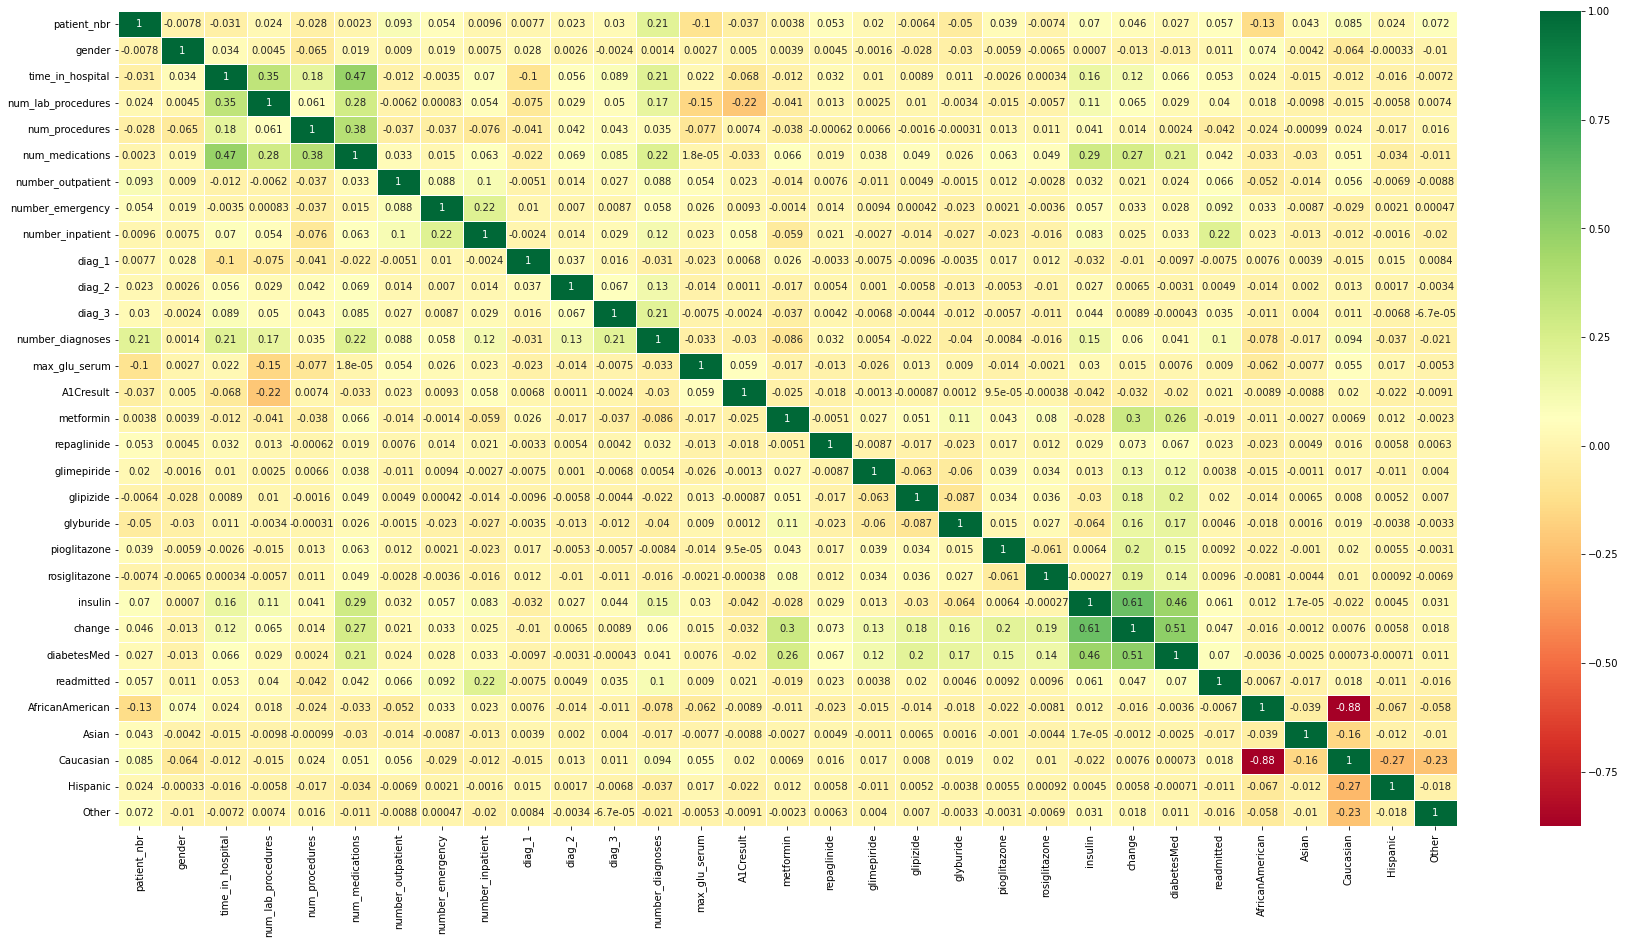

In [126]:
correlation_matrix = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix,linewidths=1,annot=True,cmap="RdYlGn")
plt.show()

In [127]:
# Function to remove columns having correlation coefficient lesser than threshold value provided

def remove_columns_below_threshold(df, target_column, threshold, corr_matrix):
    # Get the correlation coefficients of the target column
    target_corr = corr_matrix[target_column]
    
    # Get the column names with correlation coefficients below the threshold
    columns_below_threshold = target_corr[target_corr < threshold].index.tolist()
    
    # Remove the columns from the dataframe
    df = df.drop(columns_below_threshold, axis=1)
    
    return df

### After studying the trend of coefficients, choosing 0.05 as the threshold

In [128]:
df_features_selected = remove_columns_below_threshold(df, "diabetesMed", 0.05, df.corr())

In [129]:
df_features_selected.shape

(72066, 14)

In [130]:
df_features_selected.columns

Index(['age', 'time_in_hospital', 'num_medications', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [131]:
df_features_selected.head()

,age,time_in_hospital,num_medications,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
4,45.0,1,8,1,1,1,2,1,1,1,1,1,1,0
5,55.0,3,16,1,1,1,1,1,1,1,1,0,1,1
7,75.0,5,12,1,1,1,1,2,1,1,0,0,1,1
8,85.0,13,28,1,1,1,2,1,1,1,1,1,1,0
9,95.0,12,18,1,1,1,1,1,1,2,1,1,1,0


In [132]:
df = df_features_selected

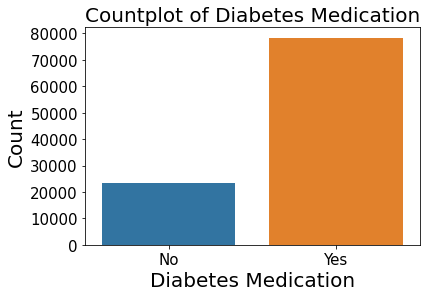

In [104]:
column_name = "diabetesMed"

# Create a countplot using seaborn
plt.figure(figsize=(6, 4))  # Set the figure size if desired

sns.countplot(data=df, x=column_name)

plt.xlabel("Diabetes Medication", fontsize=20)  # Increase xlabel size
plt.ylabel("Count", fontsize=20)  # Increase ylabel size
plt.title("Countplot of Diabetes Medication", fontsize=20)  # Increase title size

plt.xticks(fontsize=15)  # Increase xtick label size
plt.yticks(fontsize=15)  # Increase ytick label size

plt.show()

In [134]:
'''As you can see we have more cases where the person is diabetic as compared to cases where the person
is not diabetic. This is an unbalanced dataset and so we need to balance it'''

'''
SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used for addressing imbalanced 
datasets. It generates synthetic samples of the minority class by interpolating between existing 
instances, aiming to balance the class distribution. By creating new synthetic examples, 
SMOTE helps overcome the bias caused by imbalanced data, improving the performance of 
classification models. It identifies the minority class, finds the nearest neighbors, 
and generates synthetic samples through interpolation
'''


'\nSMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used for addressing imbalanced \ndatasets. It generates synthetic samples of the minority class by interpolating between existing \ninstances, aiming to balance the class distribution. By creating new synthetic examples, \nSMOTE helps overcome the bias caused by imbalanced data, improving the performance of \nclassification models. It identifies the minority class, finds the nearest neighbors, \nand generates synthetic samples through interpolation\n'

In [135]:
'''
Further workflow:
for every model:

accuracy_training = []
TruePositive_training = []
TrueNegative_training = []
TruePositive_training = []
FalsePositive_training = []
FalseNegative_training = []
Precision_training = []
F1Score_training = []

accuracy_testing = []
TruePositive_testing = []
TrueNegative_testing = []
TruePositive_testing = []
FalsePositive_testing = []
FalseNegative_testing = []
Precision_testing = []
F1Score_testing = []

pass it to the function KFoldCrossValidation(model, num_folds, data_split_ratio, SMOTE_ratio)
Inside the function for every fold:
    split the data into training and testing in data_split_ratio
    Oversampling is done on training data using SMOTE of ratio SMOTE_ratio
'''

'\nFurther workflow:\nfor every model:\n\naccuracy_training = []\nTruePositive_training = []\nTrueNegative_training = []\nTruePositive_training = []\nFalsePositive_training = []\nFalseNegative_training = []\nPrecision_training = []\nF1Score_training = []\n\naccuracy_testing = []\nTruePositive_testing = []\nTrueNegative_testing = []\nTruePositive_testing = []\nFalsePositive_testing = []\nFalseNegative_testing = []\nPrecision_testing = []\nF1Score_testing = []\n\npass it to the function KFoldCrossValidation(model, num_folds, data_split_ratio, SMOTE_ratio)\nInside the function for every fold:\n    split the data into training and testing in data_split_ratio\n    Oversampling is done on training data using SMOTE of ratio SMOTE_ratio\n'

In [136]:
# Will be choosing accuracy as the metrics for hyperparameters tuning

## Preparing the sophisticated model training pipeline

In [137]:
# Choosing the number of folds such that my training testing data ratio is 0.15 (ideal split ratio)
'''
Training set size: 85% of 72,000 samples = 0.85 * 72,000 = 61,200 samples
Testing set size: 15% of 72,000 samples = 0.15 * 72,000 = 10,800 samples
Determine the value of K:

Each fold in K-fold cross-validation should have an equal number of samples.
To maintain a 15% testing data ratio, the number of samples in each fold's testing set 
should be 15% of the total testing set size.
Therefore, the number of samples in each fold's testing set would be: 0.15 * 10,800 = 1,620 samples.
Calculate the value of K:

Since each fold has the same number of samples, we can calculate K by dividing the total number 
of testing samples by the number of samples in each fold's testing set:
K = Total testing samples / Samples in each fold's testing set = 10,800 / 1,620 = 6.67 (approximately).
'''

"\nTraining set size: 85% of 72,000 samples = 0.85 * 72,000 = 61,200 samples\nTesting set size: 15% of 72,000 samples = 0.15 * 72,000 = 10,800 samples\nDetermine the value of K:\n\nEach fold in K-fold cross-validation should have an equal number of samples.\nTo maintain a 15% testing data ratio, the number of samples in each fold's testing set \nshould be 15% of the total testing set size.\nTherefore, the number of samples in each fold's testing set would be: 0.15 * 10,800 = 1,620 samples.\nCalculate the value of K:\n\nSince each fold has the same number of samples, we can calculate K by dividing the total number \nof testing samples by the number of samples in each fold's testing set:\nK = Total testing samples / Samples in each fold's testing set = 10,800 / 1,620 = 6.67 (approximately).\n"


The following are my SMOTE ratio's which will be experimented on:
[0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1] 
The number of Kfolds which came out to be 6.67, will be taken as 7


In [138]:
# Explaining about my function perform_smote_cross_validation
'''
The perform_smote_cross_validation function performs a cross-validation using K-Fold methodology
while incorporating SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced datasets.
It takes a machine learning model, features x, target variable Y, number of folds num_folds, and 
an array of SMOTE strategy values smote_strategy_arr as inputs.

Within each fold, it resamples the training data using SMOTE with different strategy values,
trains the model, and evaluates its accuracy on the corresponding test data. It keeps track of
the best accuracy achieved so far, along with the corresponding training and testing data index 
ranges and the SMOTE strategy that resulted in the best accuracy.

By iterating through different fold combinations and SMOTE strategies, the function identifies the
model configuration that yields the highest accuracy. This allows for robust evaluation of the 
model's performance and selection of the optimal SMOTE strategy for the given dataset.

Overall, this function combines K-Fold cross-validation with SMOTE to enhance model training and 
evaluation, enabling the identification of the best-performing model configuration for 
imbalanced datasets.
'''

"\nThe perform_smote_cross_validation function performs a cross-validation using K-Fold methodology\nwhile incorporating SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced datasets.\nIt takes a machine learning model, features x, target variable Y, number of folds num_folds, and \nan array of SMOTE strategy values smote_strategy_arr as inputs.\n\nWithin each fold, it resamples the training data using SMOTE with different strategy values,\ntrains the model, and evaluates its accuracy on the corresponding test data. It keeps track of\nthe best accuracy achieved so far, along with the corresponding training and testing data index \nranges and the SMOTE strategy that resulted in the best accuracy.\n\nBy iterating through different fold combinations and SMOTE strategies, the function identifies the\nmodel configuration that yields the highest accuracy. This allows for robust evaluation of the \nmodel's performance and selection of the optimal SMOTE strategy for the give

In [241]:
def perform_smote_cross_validation(model_instance, x, Y, num_folds, smote_strategy_arr):
    best_train_range = None
    best_test_range = None
    best_smote_strategy = None
    
    best_train_accuracy = 0.0
    best_test_accuracy = 0.0
    best_total_accuracy = 0.0
    
    kf = KFold(n_splits=num_folds)
    kf_count = 1
    for train_index, test_index in kf.split(x, Y):
        print("KFold combination number:", kf_count)
        kf_count += 1
        print("Current split indexes: ")
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Dropping all the indexes
        try:
            X_train.drop("index", axis=1, inplace=True)
            X_test.drop("index", axis=1, inplace=True)
            y_train.drop("index", axis=1, inplace=True)
            y_test.drop("index", axis=1, inplace=True)
        except KeyError:
            pass
        
        for smote_strategy in smote_strategy_arr:
            
            model = model_instance  # Create a new model instance for each iteration
            
            smote = SMOTE(sampling_strategy=smote_strategy)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            
            model.fit(X_train_resampled, y_train_resampled)
            
            train_accuracy = model.score(X_train_resampled, y_train_resampled)
            test_accuracy = model.score(X_test, y_test)
            total_accuracy = train_accuracy + test_accuracy
            
            print("Current train accuracy:", train_accuracy)
            print("Current test accuracy:", test_accuracy)

            
            if total_accuracy > best_total_accuracy:
                best_total_accuracy = total_accuracy
                best_train_range = (train_index.min(), train_index.max())
                best_test_range = (test_index.min(), test_index.max())
                best_smote_strategy = smote_strategy
                best_train_accuracy = train_accuracy
                best_test_accuracy = test_accuracy
            
            print("Best train accuracy so far:", best_train_accuracy)
            print("Best test accuracy so far:", test_accuracy)
            print()
            
    return best_train_range, best_test_range, best_smote_strategy, best_train_accuracy, best_test_accuracy

In [242]:
# Function to train the model based on the results I got (will use this model to evaulate 
# performance metrics)
def train_model_with_smote(model, x, Y, best_train_range, best_test_range, best_smote_strategy):
    X_train = x.iloc[best_train_range[0]:best_train_range[1]+1]
    X_test = x.iloc[best_test_range[0]:best_test_range[1]+1]
    y_train = Y.iloc[best_train_range[0]:best_train_range[1]+1]
    y_test = Y.iloc[best_test_range[0]:best_test_range[1]+1]
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    smote = SMOTE(sampling_strategy=best_smote_strategy)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    model.fit(X_train_resampled, y_train_resampled)
    
    return model

In [243]:
def split_data(x, y, train_range, test_range):
    train_indices = list(range(train_range[0], train_range[1] + 1))
    test_indices = list(range(test_range[0], test_range[1] + 1))

    x_train = x.iloc[train_indices]
    y_train = y.iloc[train_indices]
    x_test = x.iloc[test_indices]
    y_test = y.iloc[test_indices]

    return x_train, y_train, x_test, y_test

## Model Building 

In [244]:
x = df.drop("diabetesMed",axis=1)
Y = df[["diabetesMed"]]

#### Naive Bayes

In [245]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

In [ ]:
gnb = GuassianNB()

In [246]:
NaiveBayes = perform_smote_cross_validation(GaussianNB(), x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9953758865248227
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9953758865248227
Best test accuracy so far: 0.9951437451437452

Current train accuracy: 0.9956648936170213
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9956648936170213
Best test accuracy so far: 0.9951437451437452

Current train accuracy: 0.9959198998748435
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9959198998748435
Best test accuracy so far: 0.9951437451437452

Current train accuracy: 0.9960364741641338
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9960364741641338
Best test accuracy so far: 0.9951437451437452

Current train accuracy: 0.9961465721040189
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9961465721040189
Bes

Current train accuracy: 0.9955688655211664
Current test accuracy: 0.9952404079650315
Best train accuracy so far: 0.9963207598668049
Best test accuracy so far: 0.9952404079650315

Current train accuracy: 0.995829560382099
Current test accuracy: 0.9952404079650315
Best train accuracy so far: 0.9963207598668049
Best test accuracy so far: 0.9952404079650315

Current train accuracy: 0.9959487084185096
Current test accuracy: 0.9952404079650315
Best train accuracy so far: 0.9963207598668049
Best test accuracy so far: 0.9952404079650315

Current train accuracy: 0.9960612375182183
Current test accuracy: 0.9952404079650315
Best train accuracy so far: 0.9963207598668049
Best test accuracy so far: 0.9952404079650315

Current train accuracy: 0.9961676843203207
Current test accuracy: 0.9952404079650315
Best train accuracy so far: 0.9963207598668049
Best test accuracy so far: 0.9952404079650315

Current train accuracy: 0.9962685289788094
Current test accuracy: 0.9952404079650315
Best train accuracy s

In [161]:
NaiveBayes

((0, 72065), (10296, 20590), 0.95, 0.9963207598668049, 0.9962117532782905)

In [ ]:
'''
For default NaiveBayes:
((0, 72065), (10296, 20590), 0.95, 0.9963207598668049, 0.9962117532782905)
'''

In [203]:
# Getting the training data, testing data to fit and get the reports
GNB = GaussianNB()
GNB = train_model_with_smote(GNB, x, Y, (0, 72065), (10296, 20590), 0.95)

(72066, 13) (10295, 13) (72066, 1) (10295, 1)


In [204]:
x_train, y_train, x_test, y_test = split_data(x, Y, [0, 72065], [10296, 20590])

(72066, 13) (10295, 13) (72066, 1) (10295, 1)


0.9947825604307163
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18164
           1       0.99      1.00      1.00     53902

    accuracy                           0.99     72066
   macro avg       1.00      0.99      0.99     72066
weighted avg       0.99      0.99      0.99     72066



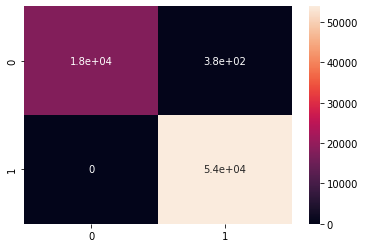

In [205]:
# Training Data

training_pred = GNB.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9962117532782905
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3028
           1       0.99      1.00      1.00      7267

    accuracy                           1.00     10295
   macro avg       1.00      0.99      1.00     10295
weighted avg       1.00      1.00      1.00     10295



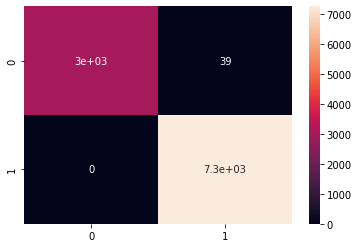

In [206]:
#testing data

testing_pred = GNB.predict(x_test)
print(accuracy_score(testing_pred,y_test))
cm = confusion_matrix(testing_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(testing_pred, y_test))

### KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [164]:
KNN = perform_smote_cross_validation(KNeighborsClassifier(), x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9409219858156028
Current test accuracy: 0.8665501165501166
Best train accuracy so far: 0.9409219858156028
Best test accuracy so far: 0.8665501165501166

Current train accuracy: 0.9439228723404255
Current test accuracy: 0.864024864024864
Best train accuracy so far: 0.9439228723404255
Best test accuracy so far: 0.864024864024864

Current train accuracy: 0.9456821026282853
Current test accuracy: 0.8602369852369852
Best train accuracy so far: 0.9439228723404255
Best test accuracy so far: 0.8602369852369852

Current train accuracy: 0.9463829787234043
Current test accuracy: 0.8606254856254856
Best train accuracy so far: 0.9439228723404255
Best test accuracy so far: 0.8606254856254856

Current train accuracy: 0.9477304964539007
Current test accuracy: 0.8622766122766122
Best train accuracy so far: 0.9477304964539007
Best 

Current train accuracy: 0.9400509512710716
Current test accuracy: 0.9090820786789704
Best train accuracy so far: 0.9484819175310454
Best test accuracy so far: 0.9090820786789704

Current train accuracy: 0.9434248619418689
Current test accuracy: 0.9116075764934434
Best train accuracy so far: 0.9484819175310454
Best test accuracy so far: 0.9116075764934434

Current train accuracy: 0.9440004955708357
Current test accuracy: 0.9091792132102963
Best train accuracy so far: 0.9484819175310454
Best test accuracy so far: 0.9091792132102963

Current train accuracy: 0.9449536864166898
Current test accuracy: 0.9078193297717339
Best train accuracy so far: 0.9484819175310454
Best test accuracy so far: 0.9078193297717339

Current train accuracy: 0.9468866829960036
Current test accuracy: 0.907722195240408
Best train accuracy so far: 0.9484819175310454
Best test accuracy so far: 0.907722195240408

Current train accuracy: 0.9482158547579108
Current test accuracy: 0.9064594463331714
Best train accuracy so

In [165]:
KNN

((0, 61770), (61771, 72065), 0.95, 0.9490897017320569, 0.9152986886838271)

In [ ]:
'''
For default KNN:
((0, 61770), (61771, 72065), 0.95, 0.9490897017320569, 0.9152986886838271)

'''

#### Hyperparameter tuning for KNN

In [169]:
KNN_num_neighbours = [3, 4, 5, 6, 7, 8, 9, 10]
best_neighbours = None
best_train_range = None
best_test_range = None
best_smote_strategy = None
best_train_accuracy = 0.0
best_test_accuracy = 0.0

best_total_accuracy = 0.0

for neighbours in KNN_num_neighbours:
    print("current neighbours value:", neighbours)
    print()
    myKNN = KNeighborsClassifier(n_neighbors=neighbours)
    train_range, test_range, smote_strategy, train_accuracy, test_accuracy = perform_smote_cross_validation(myKNN, x, Y, 7 , [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])
    total_accuracy = train_accuracy + test_accuracy
    
    print("current training accuracy:", train_accuracy)
    print("current test accuracy:", test_accuracy)

    if total_accuracy > best_total_accuracy:
        best_total_accuracy = total_accuracy
        best_neighbours = neighbours
        best_train_range = train_range
        best_test_range = test_range
        best_smote_strategy = smote_strategy
        best_train_accuracy = train_accuracy
        best_test_accuracy = test_accuracy
    
    print("current best training accuracy:", best_train_accuracy)
    print("current best test accuracy:", best_test_accuracy)

print("Best neighbors value:", best_neighbours)
print("Best train range:", best_train_range)
print("Best test range:", best_test_range)
print("Best SMOTE strategy:", best_smote_strategy)
print("Best train accuracy:", best_train_accuracy)
print("Best test accuracy:", best_test_accuracy)


current neighbours value: 3

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9598581560283688
Current test accuracy: 0.8823815073815073
Best train accuracy so far: 0.9598581560283688
Best test accuracy so far: 0.8823815073815073

Current train accuracy: 0.9621276595744681
Current test accuracy: 0.8807303807303807
Best train accuracy so far: 0.9621276595744681
Best test accuracy so far: 0.8807303807303807

Current train accuracy: 0.9637421777221526
Current test accuracy: 0.8785936285936286
Best train accuracy so far: 0.9621276595744681
Best test accuracy so far: 0.8785936285936286

Current train accuracy: 0.9645714285714285
Current test accuracy: 0.8783022533022533
Best train accuracy so far: 0.9645714285714285
Best test accuracy so far: 0.8783022533022533

Current train accuracy: 0.9655555555555555
Current test accuracy: 0.8793706293706294
Best train accuracy s

Current train accuracy: 0.9596184075017616
Current test accuracy: 0.917921321029626
Best train accuracy so far: 0.9655713883941127
Best test accuracy so far: 0.917921321029626

Current train accuracy: 0.9621982170414111
Current test accuracy: 0.9185041282175813
Best train accuracy so far: 0.9655713883941127
Best test accuracy so far: 0.9185041282175813

Current train accuracy: 0.9633277581614322
Current test accuracy: 0.9193783389995144
Best train accuracy so far: 0.9655713883941127
Best test accuracy so far: 0.9193783389995144

Current train accuracy: 0.9636236614832392
Current test accuracy: 0.9189898008742108
Best train accuracy so far: 0.9655713883941127
Best test accuracy so far: 0.9189898008742108

Current train accuracy: 0.9647825424543228
Current test accuracy: 0.9175327829043225
Best train accuracy so far: 0.9655713883941127
Best test accuracy so far: 0.9175327829043225

Current train accuracy: 0.9654924514737598
Current test accuracy: 0.9194754735308402
Best train accuracy so

Current train accuracy: 0.9309509082417097
Current test accuracy: 0.8660514813016027
Best train accuracy so far: 0.9385404053549402
Best test accuracy so far: 0.8660514813016027

Current train accuracy: 0.932838749233599
Current test accuracy: 0.8645944633317144
Best train accuracy so far: 0.9385404053549402
Best test accuracy so far: 0.8645944633317144

Current train accuracy: 0.9348354792560801
Current test accuracy: 0.867508499271491
Best train accuracy so far: 0.9348354792560801
Best test accuracy so far: 0.867508499271491

Current train accuracy: 0.9360051038162626
Current test accuracy: 0.8645944633317144
Best train accuracy so far: 0.9348354792560801
Best test accuracy so far: 0.8645944633317144

Current train accuracy: 0.9386604924327987
Current test accuracy: 0.8674113647401651
Best train accuracy so far: 0.9386604924327987
Best test accuracy so far: 0.8674113647401651

Current train accuracy: 0.9398921536260592
Current test accuracy: 0.8668285575522098
Best train accuracy so 

Current train accuracy: 0.9462536952105206
Current test accuracy: 0.8681884409907722
Best train accuracy so far: 0.9426917703412947
Best test accuracy so far: 0.8681884409907722

Current train accuracy: 0.9479000342996369
Current test accuracy: 0.8686741136474017
Best train accuracy so far: 0.9479000342996369
Best test accuracy so far: 0.8686741136474017

Current train accuracy: 0.9487560127966121
Current test accuracy: 0.8689655172413793
Best train accuracy so far: 0.9487560127966121
Best test accuracy so far: 0.8689655172413793

Current train accuracy: 0.949387087376465
Current test accuracy: 0.8660514813016027
Best train accuracy so far: 0.9487560127966121
Best test accuracy so far: 0.8660514813016027

Current train accuracy: 0.9506632458103609
Current test accuracy: 0.8648858669256921
Best train accuracy so far: 0.9487560127966121
Best test accuracy so far: 0.8648858669256921

KFold combination number: 3
Current split indexes: 
TRAIN: [    0     1     2 ... 72063 72064 72065] TEST:

Current train accuracy: 0.9464658601742864
Current test accuracy: 0.9125789218067023
Best train accuracy so far: 0.9440361089187056
Best test accuracy so far: 0.9125789218067023

Current train accuracy: 0.9474658670119721
Current test accuracy: 0.9139388052452647
Best train accuracy so far: 0.9474658670119721
Best test accuracy so far: 0.9139388052452647

Current train accuracy: 0.9483813845387637
Current test accuracy: 0.913647401651287
Best train accuracy so far: 0.9483813845387637
Best test accuracy so far: 0.913647401651287

current training accuracy: 0.9483813845387637
current test accuracy: 0.913647401651287
current best training accuracy: 0.9655603262227674
current best test accuracy: 0.9275376396308888
current neighbours value: 6

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9157730496453901
Current test accuracy: 0.837024087024087
Best train accurac

Current train accuracy: 0.9253220451148408
Current test accuracy: 0.8814958717824186
Best train accuracy so far: 0.9225340238468024
Best test accuracy so far: 0.8814958717824186

Current train accuracy: 0.9280036465108006
Current test accuracy: 0.8833414278776105
Best train accuracy so far: 0.9280036465108006
Best test accuracy so far: 0.8833414278776105

KFold combination number: 6
Current split indexes: 
TRAIN: [    0     1     2 ... 72063 72064 72065] TEST: [51476 51477 51478 ... 61768 61769 61770]
Current train accuracy: 0.9096756475485661
Current test accuracy: 0.8879067508499271
Best train accuracy so far: 0.9280036465108006
Best test accuracy so far: 0.8879067508499271

Current train accuracy: 0.9141552387663288
Current test accuracy: 0.8865468674113648
Best train accuracy so far: 0.9280036465108006
Best test accuracy so far: 0.8865468674113648

Current train accuracy: 0.9183512096825619
Current test accuracy: 0.8852841185041282
Best train accuracy so far: 0.9280036465108006
Bes

Current train accuracy: 0.9382525470824329
Current test accuracy: 0.8704225352112676
Best train accuracy so far: 0.9359840076242721
Best test accuracy so far: 0.8704225352112676

KFold combination number: 4
Current split indexes: 
TRAIN: [    0     1     2 ... 72063 72064 72065] TEST: [30886 30887 30888 ... 41178 41179 41180]
Current train accuracy: 0.9259227467811159
Current test accuracy: 0.8815930063137445
Best train accuracy so far: 0.9359840076242721
Best test accuracy so far: 0.8815930063137445

Current train accuracy: 0.9287285407725322
Current test accuracy: 0.8824672170956775
Best train accuracy so far: 0.9287285407725322
Best test accuracy so far: 0.8824672170956775

Current train accuracy: 0.9310897638192858
Current test accuracy: 0.8787761049052938
Best train accuracy so far: 0.9287285407725322
Best test accuracy so far: 0.8787761049052938

Current train accuracy: 0.9324708767627222
Current test accuracy: 0.8753763963088879
Best train accuracy so far: 0.9287285407725322
Bes

Current train accuracy: 0.9071077805217292
Current test accuracy: 0.8386595434677028
Best train accuracy so far: 0.9071077805217292
Best test accuracy so far: 0.8386595434677028

Current train accuracy: 0.9096533830084492
Current test accuracy: 0.8334142787761049
Best train accuracy so far: 0.9071077805217292
Best test accuracy so far: 0.8334142787761049

Current train accuracy: 0.9135650954265391
Current test accuracy: 0.8296260320543953
Best train accuracy so far: 0.9071077805217292
Best test accuracy so far: 0.8296260320543953

Current train accuracy: 0.9146969014975487
Current test accuracy: 0.8275862068965517
Best train accuracy so far: 0.9071077805217292
Best test accuracy so far: 0.8275862068965517

Current train accuracy: 0.9168411217164011
Current test accuracy: 0.8261291889266634
Best train accuracy so far: 0.9071077805217292
Best test accuracy so far: 0.8261291889266634

Current train accuracy: 0.9189509539920366
Current test accuracy: 0.826420592520641
Best train accuracy s

Current train accuracy: 0.9092305543918447
Current test accuracy: 0.8890723652258378
Best train accuracy so far: 0.9092305543918447
Best test accuracy so far: 0.8890723652258378

Current train accuracy: 0.9112445737963694
Current test accuracy: 0.8883924235065566
Best train accuracy so far: 0.9112445737963694
Best test accuracy so far: 0.8883924235065566

Current train accuracy: 0.9129777948299842
Current test accuracy: 0.88712967459932
Best train accuracy so far: 0.9129777948299842
Best test accuracy so far: 0.88712967459932

Current train accuracy: 0.9153066343136455
Current test accuracy: 0.8873239436619719
Best train accuracy so far: 0.9153066343136455
Best test accuracy so far: 0.8873239436619719

Current train accuracy: 0.9161271269224653
Current test accuracy: 0.8851869839728024
Best train accuracy so far: 0.9153066343136455
Best test accuracy so far: 0.8851869839728024

Current train accuracy: 0.91713795584085
Current test accuracy: 0.8815930063137445
Best train accuracy so far

Current train accuracy: 0.9214236162727317
Current test accuracy: 0.889752306945119
Best train accuracy so far: 0.9198260581251514
Best test accuracy so far: 0.889752306945119

Current train accuracy: 0.9226905937612911
Current test accuracy: 0.8892666342884895
Best train accuracy so far: 0.9198260581251514
Best test accuracy so far: 0.8892666342884895

Current train accuracy: 0.924697665697947
Current test accuracy: 0.8903351141330743
Best train accuracy so far: 0.924697665697947
Best test accuracy so far: 0.8903351141330743

Current train accuracy: 0.9265314970961742
Current test accuracy: 0.8876153472559495
Best train accuracy so far: 0.924697665697947
Best test accuracy so far: 0.8876153472559495

Current train accuracy: 0.9272031929204327
Current test accuracy: 0.8877124817872754
Best train accuracy so far: 0.924697665697947
Best test accuracy so far: 0.8877124817872754

KFold combination number: 6
Current split indexes: 
TRAIN: [    0     1     2 ... 72063 72064 72065] TEST: [514

Current train accuracy: 0.9065531081274786
Current test accuracy: 0.8412821758135017
Best train accuracy so far: 0.8989722345656007
Best test accuracy so far: 0.8412821758135017

Current train accuracy: 0.9098801734057019
Current test accuracy: 0.8420592520641088
Best train accuracy so far: 0.8989722345656007
Best test accuracy so far: 0.8420592520641088

Current train accuracy: 0.9107132753177091
Current test accuracy: 0.8399222923749393
Best train accuracy so far: 0.8989722345656007
Best test accuracy so far: 0.8399222923749393

Current train accuracy: 0.9120319322542231
Current test accuracy: 0.8387566779990286
Best train accuracy so far: 0.8989722345656007
Best test accuracy so far: 0.8387566779990286

KFold combination number: 4
Current split indexes: 
TRAIN: [    0     1     2 ... 72063 72064 72065] TEST: [30886 30887 30888 ... 41178 41179 41180]
Current train accuracy: 0.8965379113018598
Current test accuracy: 0.8577950461389023
Best train accuracy so far: 0.8965379113018598
Bes

In [153]:
# Performance Metrics for it
'''
Best neighbors value: 3
Best train range: (0, 61770)
Best test range: (61771, 72065)
Best SMOTE strategy: 0.9
Best train accuracy: 0.9655603262227674
Best test accuracy: 0.9275376396308888
'''

'\nBest neighbors value: 3\nBest train range: (0, 61770)\nBest test range: (61771, 72065)\nBest SMOTE strategy: 0.9\nBest train accuracy: 0.9655603262227674\nBest test accuracy: 0.9275376396308888\n'

In [210]:
x_train, y_train, x_test, y_test = split_data(x, Y, [0, 61770], [61771, 72065])

(61771, 13) (10295, 13) (61771, 1) (10295, 1)


In [211]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [212]:
x_train.shape

(61771, 13)

In [213]:
y_train.shape

(61771, 1)

0.953975166340192
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     17848
           1       0.94      1.00      0.97     43923

    accuracy                           0.95     61771
   macro avg       0.96      0.92      0.94     61771
weighted avg       0.96      0.95      0.95     61771



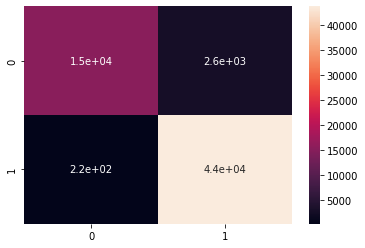

In [215]:
# Training data

training_pred = knn.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9314230208839243
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2917
           1       0.92      0.99      0.95      7378

    accuracy                           0.93     10295
   macro avg       0.94      0.89      0.91     10295
weighted avg       0.93      0.93      0.93     10295



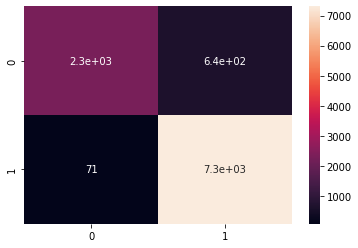

In [216]:
#  Testing Data

test_pred = knn.predict(x_test)
print(accuracy_score(test_pred,y_test))
cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,y_test))

## Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression
LogisticReg = model = LogisticRegression()

In [171]:
LR = perform_smote_cross_validation(LogisticRegression(), x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9915602836879432
Current test accuracy: 0.9932012432012433
Best train accuracy so far: 0.9915602836879432
Best test accuracy so far: 0.9932012432012433

Current train accuracy: 0.9796010638297873
Current test accuracy: 0.9797979797979798
Best train accuracy so far: 0.9915602836879432
Best test accuracy so far: 0.9797979797979798

Current train accuracy: 0.9925531914893617
Current test accuracy: 0.9932012432012433
Best train accuracy so far: 0.9925531914893617
Best test accuracy so far: 0.9932012432012433

Current train accuracy: 0.9927416413373861
Current test accuracy: 0.9932012432012433
Best train accuracy so far: 0.9927416413373861
Best test accuracy so far: 0.9932012432012433

Current train accuracy: 0.9781914893617021
Current test accuracy: 0.9757187257187258
Best train accuracy so far: 0.9927416413373861
Bes

Current train accuracy: 0.9923302075993279
Current test accuracy: 0.9903836813987372
Best train accuracy so far: 0.9931569867740081
Best test accuracy so far: 0.9903836813987372

Current train accuracy: 0.9926411508882909
Current test accuracy: 0.9902865468674114
Best train accuracy so far: 0.9931569867740081
Best test accuracy so far: 0.9902865468674114

Current train accuracy: 0.9825559065848974
Current test accuracy: 0.9819329771733851
Best train accuracy so far: 0.9931569867740081
Best test accuracy so far: 0.9819329771733851

Current train accuracy: 0.9885812023463942
Current test accuracy: 0.9865954346770277
Best train accuracy so far: 0.9931569867740081
Best test accuracy so far: 0.9865954346770277

Current train accuracy: 0.9848348119587
Current test accuracy: 0.9833899951432734
Best train accuracy so far: 0.9931569867740081
Best test accuracy so far: 0.9833899951432734

Current train accuracy: 0.9934841897458719
Current test accuracy: 0.9903836813987372
Best train accuracy so 

In [172]:
LR

((10296, 72065), (0, 10295), 0.85, 0.9931569867740081, 0.9932012432012433)

In [223]:
# Get the best logistic regresion model obtained 
LogisticReg = model = LogisticRegression()
LogisticReg = train_model_with_smote(LogisticReg, x, Y, (10296, 72065), (0, 10295), 0.85)

(61770, 13) (10296, 13) (61770, 1) (10296, 1)


0.9786955043628888
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     16751
           1       0.97      1.00      0.99     45020

    accuracy                           0.98     61771
   macro avg       0.99      0.96      0.97     61771
weighted avg       0.98      0.98      0.98     61771



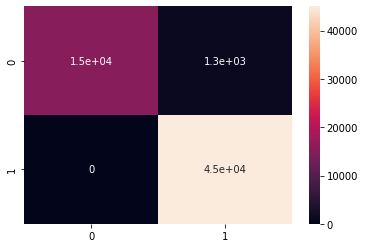

In [224]:
#  training data

training_pred = LogisticReg.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9869839728023312
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2487
           1       0.98      1.00      0.99      7808

    accuracy                           0.99     10295
   macro avg       0.99      0.97      0.98     10295
weighted avg       0.99      0.99      0.99     10295



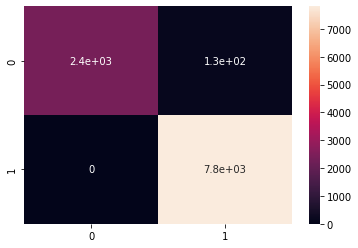

In [225]:
#  testing data

test_pred = LogisticReg.predict(x_test)
print(accuracy_score(test_pred,y_test))
cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,y_test))

### Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier


reg_classifier = RandomForestClassifier()

In [174]:
RFC = perform_smote_cross_validation(RandomForestClassifier(), x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9959007092198582
Current test accuracy: 0.9949494949494949
Best train accuracy so far: 0.9959007092198582
Best test accuracy so far: 0.9949494949494949

Current train accuracy: 0.9961436170212766
Current test accuracy: 0.9946581196581197
Best train accuracy so far: 0.9959007092198582
Best test accuracy so far: 0.9946581196581197

Current train accuracy: 0.9963454317897372
Current test accuracy: 0.9948523698523698
Best train accuracy so far: 0.9963454317897372
Best test accuracy so far: 0.9948523698523698

Current train accuracy: 0.9964376899696049
Current test accuracy: 0.9948523698523698
Best train accuracy so far: 0.9964376899696049
Best test accuracy so far: 0.9948523698523698

Current train accuracy: 0.9965602836879432
Current test accuracy: 0.9948523698523698
Best train accuracy so far: 0.9965602836879432
Bes

Current train accuracy: 0.9959889424901078
Current test accuracy: 0.9949490043710539
Best train accuracy so far: 0.9966810415415689
Best test accuracy so far: 0.9949490043710539

Current train accuracy: 0.9962376767973065
Current test accuracy: 0.9947547353084021
Best train accuracy so far: 0.9966810415415689
Best test accuracy so far: 0.9947547353084021

Current train accuracy: 0.9963699436288175
Current test accuracy: 0.9949490043710539
Best train accuracy so far: 0.9966810415415689
Best test accuracy so far: 0.9949490043710539

Current train accuracy: 0.9964346370195493
Current test accuracy: 0.9948518698397281
Best train accuracy so far: 0.9966810415415689
Best test accuracy so far: 0.9948518698397281

Current train accuracy: 0.9965661513940488
Current test accuracy: 0.9949490043710539
Best train accuracy so far: 0.9966810415415689
Best test accuracy so far: 0.9949490043710539

Current train accuracy: 0.9966222769961087
Current test accuracy: 0.9949490043710539
Best train accuracy 

In [175]:
RFC

((0, 72065), (10296, 20590), 0.95, 0.9966810415415689, 0.9956289460903351)

In [149]:
RFC = train_model_with_smote(reg_classifier, x, Y, (0, 72065), (10296, 20590), 0.95)

(72066, 13) (10295, 13) (72066, 1) (10295, 1)


In [150]:
x_train, y_train, x_test, y_test = split_data(x, Y, [0, 72065], [10296, 20590])

0.9953098548552716
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18126
           1       0.99      1.00      1.00     53940

    accuracy                           1.00     72066
   macro avg       1.00      0.99      0.99     72066
weighted avg       1.00      1.00      1.00     72066



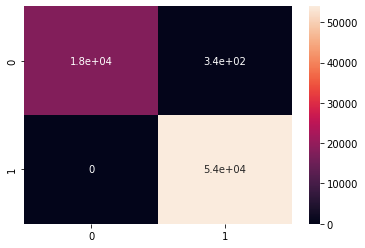

In [151]:
# training data

training_pred = RFC.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9966974259349198
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3023
           1       1.00      1.00      1.00      7272

    accuracy                           1.00     10295
   macro avg       1.00      0.99      1.00     10295
weighted avg       1.00      1.00      1.00     10295



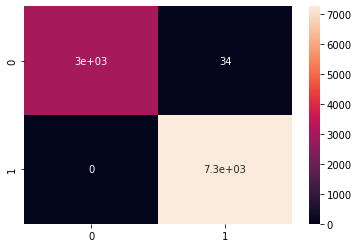

In [152]:
# testing data
test_pred = RFC.predict(x_test)
print(accuracy_score(test_pred,y_test))
cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,y_test))

### Tuning for Random Forest

In [227]:
# Here is my parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],                     # Number of trees in the forest
    'criterion': ['gini', 'entropy'],                               # Split quality criterion
    'max_depth': [None, 5, 10, 20, 50],                              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],                         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],                             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],                       # Number of features to consider when looking for the best split
    'bootstrap': [True, False],                                      # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced', 'balanced_subsample'],        # Weights associated with classes
    'random_state': [42]                                             # Random seed for reproducibility
}

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from imblearn.over_sampling import SMOTE

def RSCV_perform_smote_cross_validation(model, x, Y, num_folds, smote_strategy_arr, param_grid):
    best_train_range = None
    best_test_range = None
    best_smote_strategy = None
    best_train_accuracy = 0.0
    best_test_accuracy = 0.0
    best_total_accuracy = 0.0
    best_params = None
    
    kf = KFold(n_splits=num_folds)
    kf_count = 1
    
    for train_index, test_index in kf.split(x, Y):
        print("KFold combination number:", kf_count)
        kf_count += 1
        print("Current split indexes: ")
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        for smote_strategy in smote_strategy_arr:
            smote = SMOTE(sampling_strategy=smote_strategy)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

            # Create a Random Forest Classifier instance
            rf_classifier = RandomForestClassifier()

            # Perform randomized search CV
            random_search = RandomizedSearchCV(
                estimator=rf_classifier,
                param_distributions=param_grid,
                n_iter=10,                                              # Number of parameter settings to sample
                scoring='accuracy',                                     # Scoring metric for evaluation
                cv=5,                                                   # Number of cross-validation folds
                random_state=42                                         # Random seed for reproducibility
            )

            # Fit the randomized search to the resampled data
            random_search.fit(X_train_resampled, y_train_resampled)

            # Get the best hyperparameters found
            best_params = random_search.best_params_

            # Create a Random Forest Classifier instance with the best hyperparameters
            best_model = RandomForestClassifier(**best_params)

            # Fit the best model to the resampled training data
            best_model.fit(X_train_resampled, y_train_resampled)

            train_accuracy = best_model.score(X_train_resampled, y_train_resampled)
            test_accuracy = best_model.score(X_test, y_test)
            total_accuracy = train_accuracy + test_accuracy

            print("Current train accuracy:", train_accuracy)
            print("Current test accuracy:", test_accuracy)

            if total_accuracy > best_total_accuracy:
                best_total_accuracy = total_accuracy
                best_train_range = (train_index.min(), train_index.max())
                best_test_range = (test_index.min(), test_index.max())
                best_smote_strategy = smote_strategy
                best_train_accuracy = train_accuracy
                best_test_accuracy = test_accuracy

            print("Best train accuracy so far:", best_train_accuracy)
            print("Best test accuracy so far:", best_total_accuracy)
            print()

    return best_train_range, best_test_range, best_smote_strategy, best_train_accuracy, best_test_accuracy, best_params


In [ ]:
RandomForestClassifier = RSCV_perform_smote_cross_validation(reg_classifier, x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95], param_grid)

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
Current train accuracy: 0.9953758865248227
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9953758865248227
Best test accuracy so far: 1.9905196316685678

Current train accuracy: 0.9956648936170213
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9956648936170213
Best test accuracy so far: 1.9908086387607664

Current train accuracy: 0.9959198998748435
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9959198998748435
Best test accuracy so far: 1.9910636450185888

Current train accuracy: 0.9960364741641338
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9960364741641338
Best test accuracy so far: 1.991180219307879

Current train accuracy: 0.9961465721040189
Current test accuracy: 0.9951437451437452
Best train accuracy so far: 0.9961465721040189
Best

In [ ]:
# TRAIN: [    0     1     2 ... 72063 72064 72065] TEST: [10296 10297 10298 ... 20588 20589 20590]

In [ ]:
# training_data: [0,72065], testing_data: [10296, 20590],  0.75, 
'''
Current train accuracy: 0.9955159337369437
Current test accuracy: 0.9962117532782905
'''

In [257]:
reg_classifier = RandomForestClassifier()
reg_classifier = train_model_with_smote(reg_classifier, x, Y, (0, 72065), (10296, 20590), 0.50)

(72066, 13) (10295, 13) (72066, 1) (10295, 1)


In [258]:
x_train, y_train, x_test, y_test = split_data(x, Y, [0, 72065], [10296, 20590])

0.9953237310243388
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18125
           1       0.99      1.00      1.00     53941

    accuracy                           1.00     72066
   macro avg       1.00      0.99      0.99     72066
weighted avg       1.00      1.00      1.00     72066



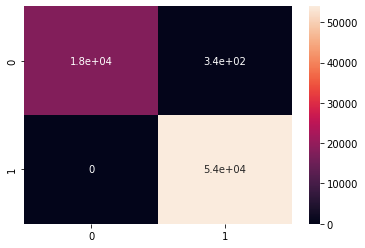

In [259]:
# Training data
training_pred = reg_classifier.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9966974259349198
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3023
           1       1.00      1.00      1.00      7272

    accuracy                           1.00     10295
   macro avg       1.00      0.99      1.00     10295
weighted avg       1.00      1.00      1.00     10295



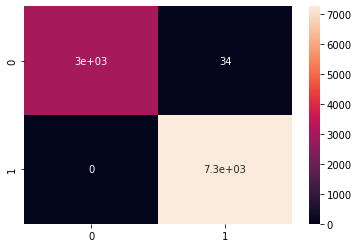

In [260]:
# Test Data
test_pred = reg_classifier.predict(x_test)
print(accuracy_score(test_pred,y_test))
cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,y_test))

## ANN

In [10]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam

ANN = keras.models.Sequential()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [203]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=256,
                                            step=16),
                               activation='relu'))

    # Additional hyperparameters to increase search space size
    model.add(layers.Dropout(hp.Float('dropout_rate', 0.0, 0.5, step=0.1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation(hp.Choice('activation', ['relu', 'sigmoid'])))
    model.add(layers.Dense(hp.Int('dense_units', 32, 512, step=32),
                           activation=hp.Choice('dense_activation', ['relu', 'sigmoid']),
                           kernel_regularizer=keras.regularizers.l2(hp.Float('l2_regularization', 0.0, 0.1))))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=30,  
    executions_per_trial=3
)


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [204]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
l2_regularization (Float)
{'defaul

In [205]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [206]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(57652, 13)
(14414, 13)
(57652, 1)
(14414, 1)


In [207]:
x_train = x_train.values
Y_train = Y_train.values
x_test = x_test.values
Y_test = Y_test.values

In [208]:
x_train = x_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [209]:
tuner.search(x_train,Y_train,epochs=10,validation_data=(x_test,Y_test)) 

Trial 30 Complete [00h 09m 15s]
val_mean_absolute_error: 0.024585222204526264

Best val_mean_absolute_error So Far: 0.012157580039153496
Total elapsed time: 02h 49m 23s
INFO:tensorflow:Oracle triggered exit


In [210]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 128
learning_rate: 0.001
dropout_rate: 0.1
activation: relu
dense_units: 256
dense_activation: sigmoid
l2_regularization: 0.022425749960926646
units_2: 128
units_3: 64
units_4: 176
units_5: 32
units_6: 64
units_7: 128
Score: 0.012157580039153496
Trial summary
Hyperparameters:
num_layers: 5
units_0: 176
units_1: 112
learning_rate: 0.001
dropout_rate: 0.0
activation: sigmoid
dense_units: 64
dense_activation: relu
l2_regularization: 0.07166596010982078
units_2: 32
units_3: 32
units_4: 144
units_5: 128
units_6: 256
units_7: 48
units_8: 240
Score: 0.013257934401432673
Trial summary
Hyperparameters:
num_layers: 6
units_0: 32
units_1: 160
learning_rate: 0.0001
dropout_rate: 0.30000000000000004
activation: relu
dense_units: 96
dense_activation: relu
l2_regularization: 0.03580289624005791
units_2: 64
units_3: 32
units_4: 224
units_5: 192
units_6: 192
units_7: 32

In [211]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_params = best_hyperparameters.values

In [212]:
best_params

{'num_layers': 7,
 'units_0': 96,
 'units_1': 128,
 'learning_rate': 0.001,
 'dropout_rate': 0.1,
 'activation': 'relu',
 'dense_units': 256,
 'dense_activation': 'sigmoid',
 'l2_regularization': 0.022425749960926646,
 'units_2': 128,
 'units_3': 64,
 'units_4': 176,
 'units_5': 32,
 'units_6': 64,
 'units_7': 128}

In [263]:
def create_ann_model(params):
    # Extract parameters
    num_layers = params['num_layers']
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    activation = params['activation']
    dense_units = params['dense_units']
    dense_activation = params['dense_activation']
    l2_regularization = params['l2_regularization']
    
    # Initialize the model
    model = Sequential()
    
    # Add the input layer
    model.add(Dense(params['units_0'], activation=activation, input_dim=13))
    model.add(Dropout(dropout_rate))
    
    # Add hidden layers
    for i in range(1, num_layers):
        units = params[f'units_{i}']
        model.add(Dense(units, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(Dropout(dropout_rate))
    
    # Add the output layer
    model.add(Dense(1, activation=dense_activation))
    
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Create the model using the provided parameters
params = {
    'num_layers': 7,
    'units_0': 96,
    'units_1': 128,
    'learning_rate': 0.001,
    'dropout_rate': 0.1,
    'activation': 'relu',
    'dense_units': 256,
    'dense_activation': 'sigmoid',
    'l2_regularization': 0.022425749960926646,
    'units_2': 128,
    'units_3': 64,
    'units_4': 176,
    'units_5': 32,
    'units_6': 64,
    'units_7': 128
}


In [270]:
ann = create_ann_model(params)

In [273]:
def perform_smote_cross_validation(model, x, Y, num_folds, smote_strategy_arr):
    best_train_range = None
    best_test_range = None
    best_smote_strategy = None
    
    best_train_accuracy = 0.0
    best_test_accuracy = 0.0
    best_total_accuracy = 0.0
    
    kf = KFold(n_splits=num_folds)
    kf_count = 1
    for train_index, test_index in kf.split(x, Y):
        print("KFold combination number:", kf_count)
        kf_count += 1
        print("Current split indexes: ")
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Dropping all the indexes
        try:
            X_train.drop("index", axis=1, inplace=True)
            X_test.drop("index", axis=1, inplace=True)
            y_train.drop("index", axis=1, inplace=True)
            y_test.drop("index", axis=1, inplace=True)
        except KeyError:
            pass
        
        for smote_strategy in smote_strategy_arr:
            smote = SMOTE(sampling_strategy=smote_strategy)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            
            X_train_resampled = X_train_resampled.astype(np.float32)
            y_train_resampled = y_train_resampled.astype(np.float32)
            X_test = X_test.astype(np.float32)
            y_test = y_test.astype(np.float32)
            
            model.fit(X_train_resampled, y_train_resampled)
            
            train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)[1]
            test_accuracy = model.evaluate(X_test, y_test)[1]
            total_accuracy = train_accuracy + test_accuracy
            
            print("Current train accuracy:", train_accuracy)
            print("Current test accuracy:", test_accuracy)

            
            if total_accuracy > best_total_accuracy:
                best_total_accuracy = total_accuracy
                best_train_range = (train_index.min(), train_index.max())
                best_test_range = (test_index.min(), test_index.max())
                best_smote_strategy = smote_strategy
                best_train_accuracy = train_accuracy
                best_test_accuracy = test_accuracy
            
            print("Best train accuracy so far:", best_train_accuracy)
            print("Best test accuracy so far:", test_accuracy)
            print()
            
    return best_train_range, best_test_range, best_smote_strategy, best_train_accuracy, best_test_accuracy

In [274]:
BestANN = perform_smote_cross_validation(ann, x, Y, 7, [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])

KFold combination number: 1
Current split indexes: 
TRAIN: [10296 10297 10298 ... 72063 72064 72065] TEST: [    0     1     2 ... 10293 10294 10295]
322/322 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9692
Current train accuracy: 0.969489336013794
Current test accuracy: 0.9692113399505615
Best train accuracy so far: 0.969489336013794
Best test accuracy so far: 0.9692113399505615

322/322 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9692
Current train accuracy: 0.9714627861976624
Current test accuracy: 0.9692113399505615
Best train accuracy so far: 0.9714627861976624
Best test accuracy so far: 0.9692113399505615

322/322 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.9691
Current train accuracy: 0.9731038808822632
Current test accuracy: 0.9691142439842224
Best train accuracy so far: 0.9731038808822632
Best test accuracy so far: 0.9691142439842224

322/322 [==============================] - 1s 2ms

322/322 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9657
Current train accuracy: 0.9737995862960815
Current test accuracy: 0.9657115340232849
Best train accuracy so far: 0.976475715637207
Best test accuracy so far: 0.9657115340232849

322/322 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9657
Current train accuracy: 0.9745152592658997
Current test accuracy: 0.9657115340232849
Best train accuracy so far: 0.976475715637207
Best test accuracy so far: 0.9657115340232849

322/322 [==============================] - 1s 2ms/step - loss: 0.1407 - accuracy: 0.9657
Current train accuracy: 0.9752156138420105
Current test accuracy: 0.9657115340232849
Best train accuracy so far: 0.976475715637207
Best test accuracy so far: 0.9657115340232849

322/322 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9657
Current train accuracy: 0.975902259349823
Current test accuracy: 0.9657115340232849
Best train accuracy so far

In [284]:
BestANN

((0, 61770), (61771, 72065), 0.95, 0.9759061336517334, 0.9717338681221008)

In [285]:
ANN = train_model_with_smote(reg_classifier, x, Y, (0, 61770), (61771, 72065), 0.50)

(61771, 13) (10295, 13) (61771, 1) (10295, 1)


In [286]:
x_train, y_train, x_test, y_test = split_data(x, Y, (0, 61770), (61771, 72065))

0.995321429149601
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15720
           1       0.99      1.00      1.00     46051

    accuracy                           1.00     61771
   macro avg       1.00      0.99      0.99     61771
weighted avg       1.00      1.00      1.00     61771



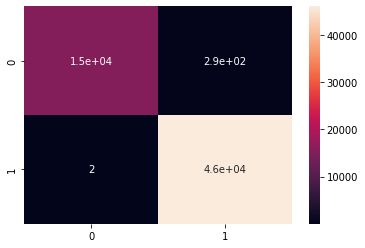

In [287]:
# Training data

training_pred = ANN.predict(x_train)
print(accuracy_score(training_pred,y_train))
cm = confusion_matrix(training_pred, y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,y_train))

0.9946576007770762
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2390
           1       0.99      1.00      1.00      7905

    accuracy                           0.99     10295
   macro avg       1.00      0.99      0.99     10295
weighted avg       0.99      0.99      0.99     10295



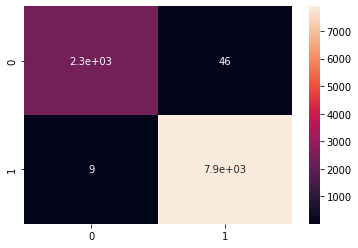

In [288]:
# Testing data

test_pred = ANN.predict(x_test)
print(accuracy_score(test_pred,y_test))
cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,y_test))

In [289]:
df.columns

Index(['age', 'time_in_hospital', 'num_medications', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')